# Exploratory Analysis: COVID-19 Lockdown

An exploratory analysis of COVID-19 lock-down data. <br>
Track D - Group 5<br>
Written by: Amir Avnit

## Initiation

In [1]:
# Import libraries
from google.colab import files
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker
import numpy as np
import pandas as pd
import scipy.stats as sci
import seaborn as sns

# Set visualization prefrences 
sns.set(font_scale=1.5, style="darkgrid")

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [15]:
# Upload data files
uploaded = files.upload()

Saving Lockdown Join with normaliztion factor.csv to Lockdown Join with normaliztion factor.csv


## Data Wrangling

In [0]:
# Read into a data frame.
df = pd.read_csv("Lockdown Join with normaliztion factor.csv")

# drop fips column
df.drop('fips',inplace=True,axis=1)

In [0]:
# Add normalized (per 1,000 people cases & deaths), then Devide by 10 to show percentage.
df['cases_perc']=df['cases']*df['Noramliztion factor (per 1,000)']/10
df['deaths_perc']=df['deaths']*df['Noramliztion factor (per 1,000)']/10

In [0]:
# change date format to DD/MM for easier vizualzition (as year is always 2020).
df['date'] = pd.to_datetime(df['date'])
df['date'] = df['date'].dt.strftime('%m/%d')

df['Date_Start_of_Lockdown'] = pd.to_datetime(df['Date_Start_of_Lockdown'])
df['Date_Start_of_Lockdown'] = df['Date_Start_of_Lockdown'].dt.strftime('%m/%d')

df['Date_End_of_Lockdown'] = pd.to_datetime(df['Date_End_of_Lockdown'])
df['Date_End_of_Lockdown'] = df['Date_End_of_Lockdown'].dt.strftime('%m/%d')

# Sort by dates
df.sort_values(by='date', inplace=True)
df.reset_index(inplace=True)

In [0]:
'''Some states don't have both start and end dates of lockdown.
For analyzing lockdown length - remove them by omitting all rows with null values, as we only want to include states
Note: for lockdown start date analysis, remove only rows with NAs in Date_Start_of_lockdown'''

# check for null values.
print('Before removing NAs:')
print('\nNAs per column:\n', df.isna().sum())

# Check dataset size.
n_rows_with_na = df.shape[0]
print('\nNumber of columns:', df.shape[1])
print('Number of rows:', df.shape[0],'\n')

# Remove rows with NAs
df_lock_start = df.copy() # Make a copy first, to keep states with start date, but not end dates
df.dropna(how='any',inplace=True)

# Check number of rows again, after removal.
print('\nAfter removing NAs:')
print('\nNumber of rows:', df.shape[0])
print('Number of rows removed:', n_rows_with_na-df.shape[0])

# check for null values again.
print('\nNAs per column:\n', df.isna().sum())

Before removing NAs:

NAs per column:
 index                                0
date                                 0
state                                0
cases                                0
deaths                               0
Date_Start_of_Lockdown             543
Date_End_of_Lockdown               929
Lockdown_Length                    929
Noramliztion factor (per 1,000)      0
cases_perc                           0
deaths_perc                          0
dtype: int64

Number of columns: 11
Number of rows: 3576 


After removing NAs:

Number of rows: 2647
Number of rows removed: 929

NAs per column:
 index                              0
date                               0
state                              0
cases                              0
deaths                             0
Date_Start_of_Lockdown             0
Date_End_of_Lockdown               0
Lockdown_Length                    0
Noramliztion factor (per 1,000)    0
cases_perc                         0
deaths_perc   

## Basic Descriptives

In [0]:
# Show variable info
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2647 entries, 0 to 3574
Data columns (total 11 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   index                            2647 non-null   int64  
 1   date                             2647 non-null   object 
 2   state                            2647 non-null   object 
 3   cases                            2647 non-null   int64  
 4   deaths                           2647 non-null   int64  
 5   Date_Start_of_Lockdown           2647 non-null   object 
 6   Date_End_of_Lockdown             2647 non-null   object 
 7   Lockdown_Length                  2647 non-null   float64
 8   Noramliztion factor (per 1,000)  2647 non-null   float64
 9   cases_perc                       2647 non-null   float64
 10  deaths_perc                      2647 non-null   float64
dtypes: float64(4), int64(3), object(4)
memory usage: 248.2+ KB


In [0]:
# Check first cases
df.head()

index   date  ... cases_perc  deaths_perc
0      0  01/21  ...   0.000013          0.0
1      1  01/22  ...   0.000013          0.0
2      2  01/23  ...   0.000013          0.0
3      3  01/24  ...   0.000008          0.0
4      4  01/24  ...   0.000013          0.0

[5 rows x 11 columns]

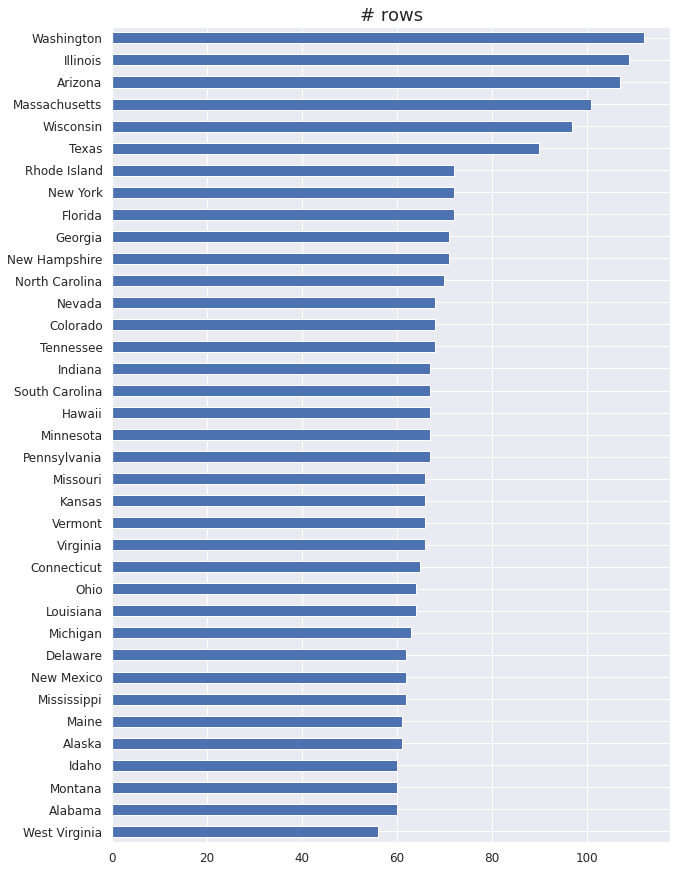

In [0]:
# Count values for each state.
# pd.value_counts(df['state'])
df['state'].value_counts().sort_values().plot(kind='barh', title='# rows', figsize=(10,15), fontsize=12)

In [0]:
# Select states with maximal number of rows to check out.
n=5
states = pd.value_counts(df['state']).index.tolist()[:n]
states_ind = df['state'].isin(states)
print(states)

['Washington', 'Illinois', 'Arizona', 'Massachusetts', 'Wisconsin']


In [0]:
# Create a df grouped by state
g_df = df.groupby(by='state')
g_df.describe().head()

cases                              ... deaths_perc                    
             count          mean           std  ...         50%       75%       max
state                                           ...                                
Alabama       60.0   3791.300000   3230.391167  ...    0.001897  0.004512  0.008219
Alaska        61.0    215.786885    138.086460  ...    0.000820  0.000957  0.001094
Arizona      107.0   2265.009346   3301.133432  ...    0.000000  0.001875  0.007447
Colorado      68.0   7034.529412   6530.061727  ...    0.003221  0.011643  0.017122
Connecticut   65.0  12695.923077  12090.388160  ...    0.010658  0.052225  0.084368

[5 rows x 48 columns]

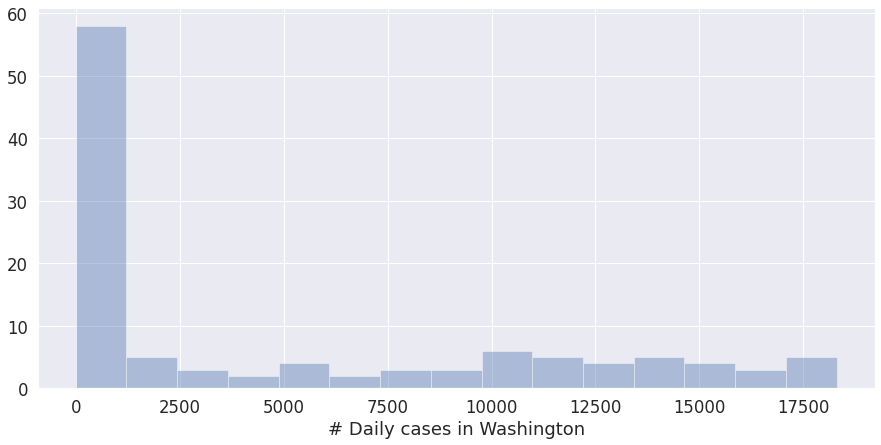

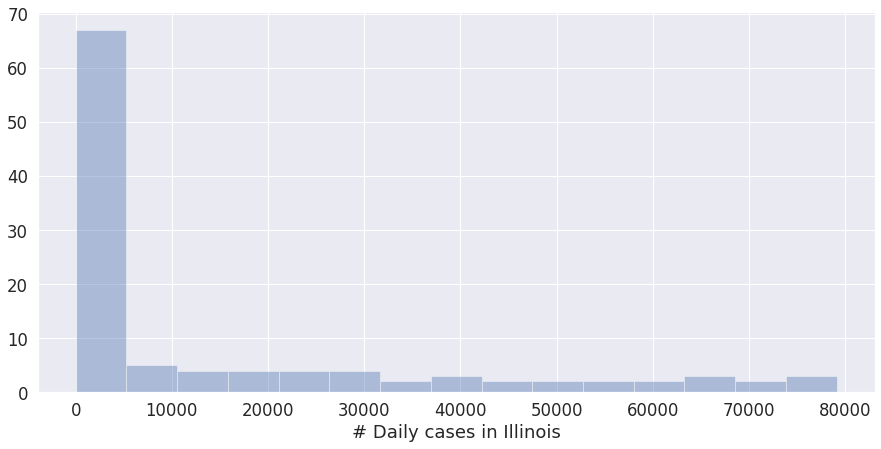

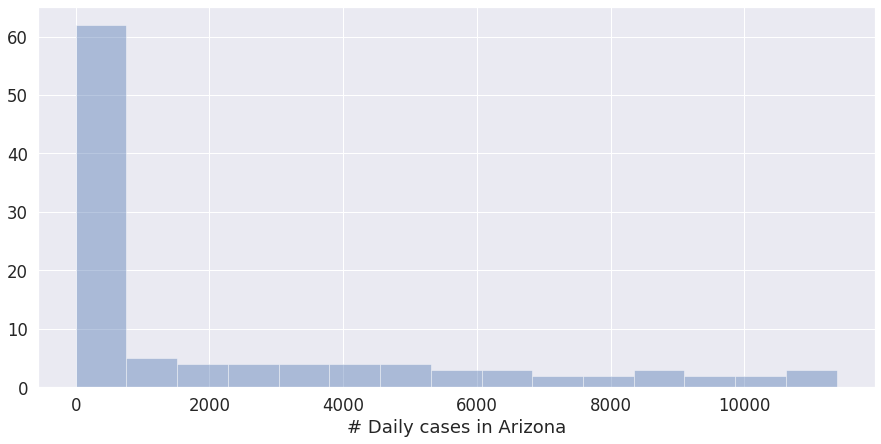

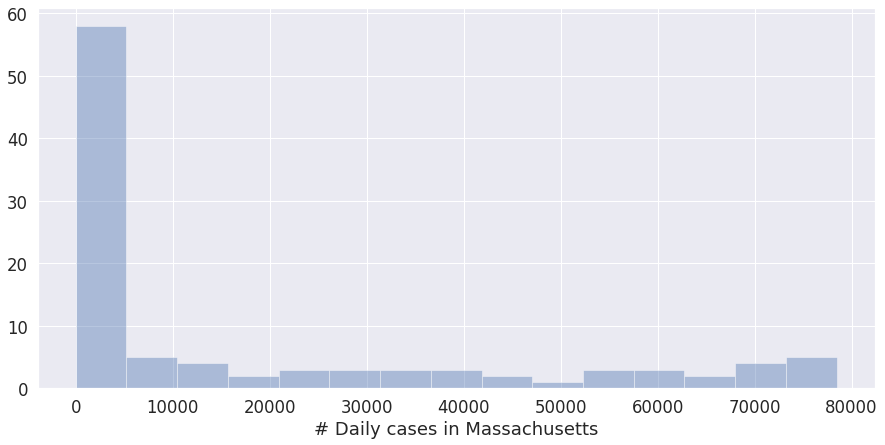

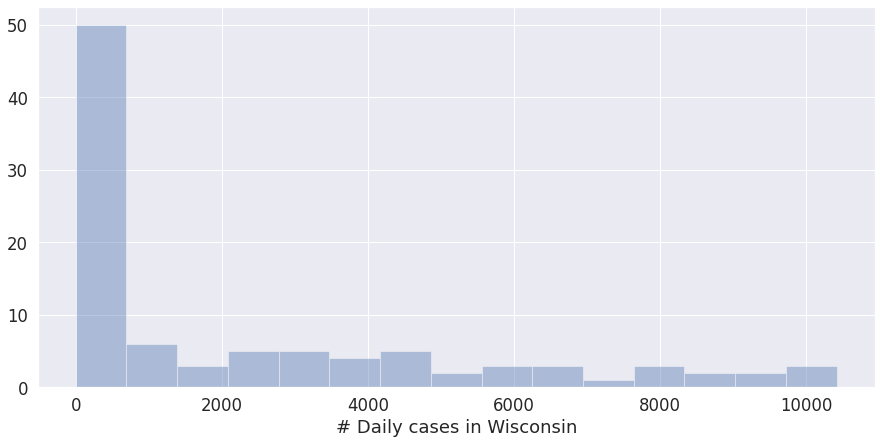

In [0]:
# Diplay a histograms of selected states for a given variable.
var_name = 'cases' # 'deaths'

for st in states:
  fig, ax = plt.subplots(figsize=(15, 7))
  sns.distplot(pd.Series(df[df['state']==st][var_name],name='# Daily '+var_name+' in '+st),hist=True,kde=False,bins=15,color='b');

## Functions

In [0]:
def plot_timeseries(df, x_var, y_var, x_interval=2, x_rotation=75):
  fig, ax = plt.subplots(figsize=(35, 10))
  sns.lineplot(x=x_var, y=y_var,
              hue='state',
              data=df[[x_var,y_var,'state']])
  
  plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);
  loc = plticker.MultipleLocator(base=x_interval)
  ax.xaxis.set_major_locator(loc)
  plt.xticks(rotation=x_rotation)
  plt.title('Daily numbers per state')
  plt.show()

In [0]:
def plot_scatter(df, x_var, y_var, x_interval=1,hue_var=None):
  fig, ax = plt.subplots(figsize=(35, 10))
  
  if hue_var:
    sns.stripplot(x=df[x_var],y=df[y_var],hue=df[hue_var])
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);
  else:
    sns.stripplot(x=df[x_var],y=df[y_var])

  loc = plticker.MultipleLocator(base=x_interval)
  ax.xaxis.set_major_locator(loc)
  plt.xticks(rotation=75)
  plt.title('Number of '+x_var+' per '+y_var)
  plt.show()

In [0]:
def plot_barplots(df, x_var, y_var, sds=None, title=None, x_rotation=75, hue_var=None, limits=None):
  fig, ax = plt.subplots(figsize=(35, 10))
  
  if hue_var is not None:
    sns.barplot(x=x_var, y=y_var, data=df, hue=df[hue_var])
  else:
    sns.barplot(x=x_var, y=y_var, data=df)

  if sds is not None:
    ax.errorbar(x=df[x_var],y=df[y_var],
              yerr=sds, fmt='none', c= 'k')
    
  if limits is not None:
    plt.ylim(limits)

  plt.xticks(rotation=x_rotation)

  if title:
    plt.title(title)
  plt.show()

## Lockdown Length Analysis

Total cases/deaths

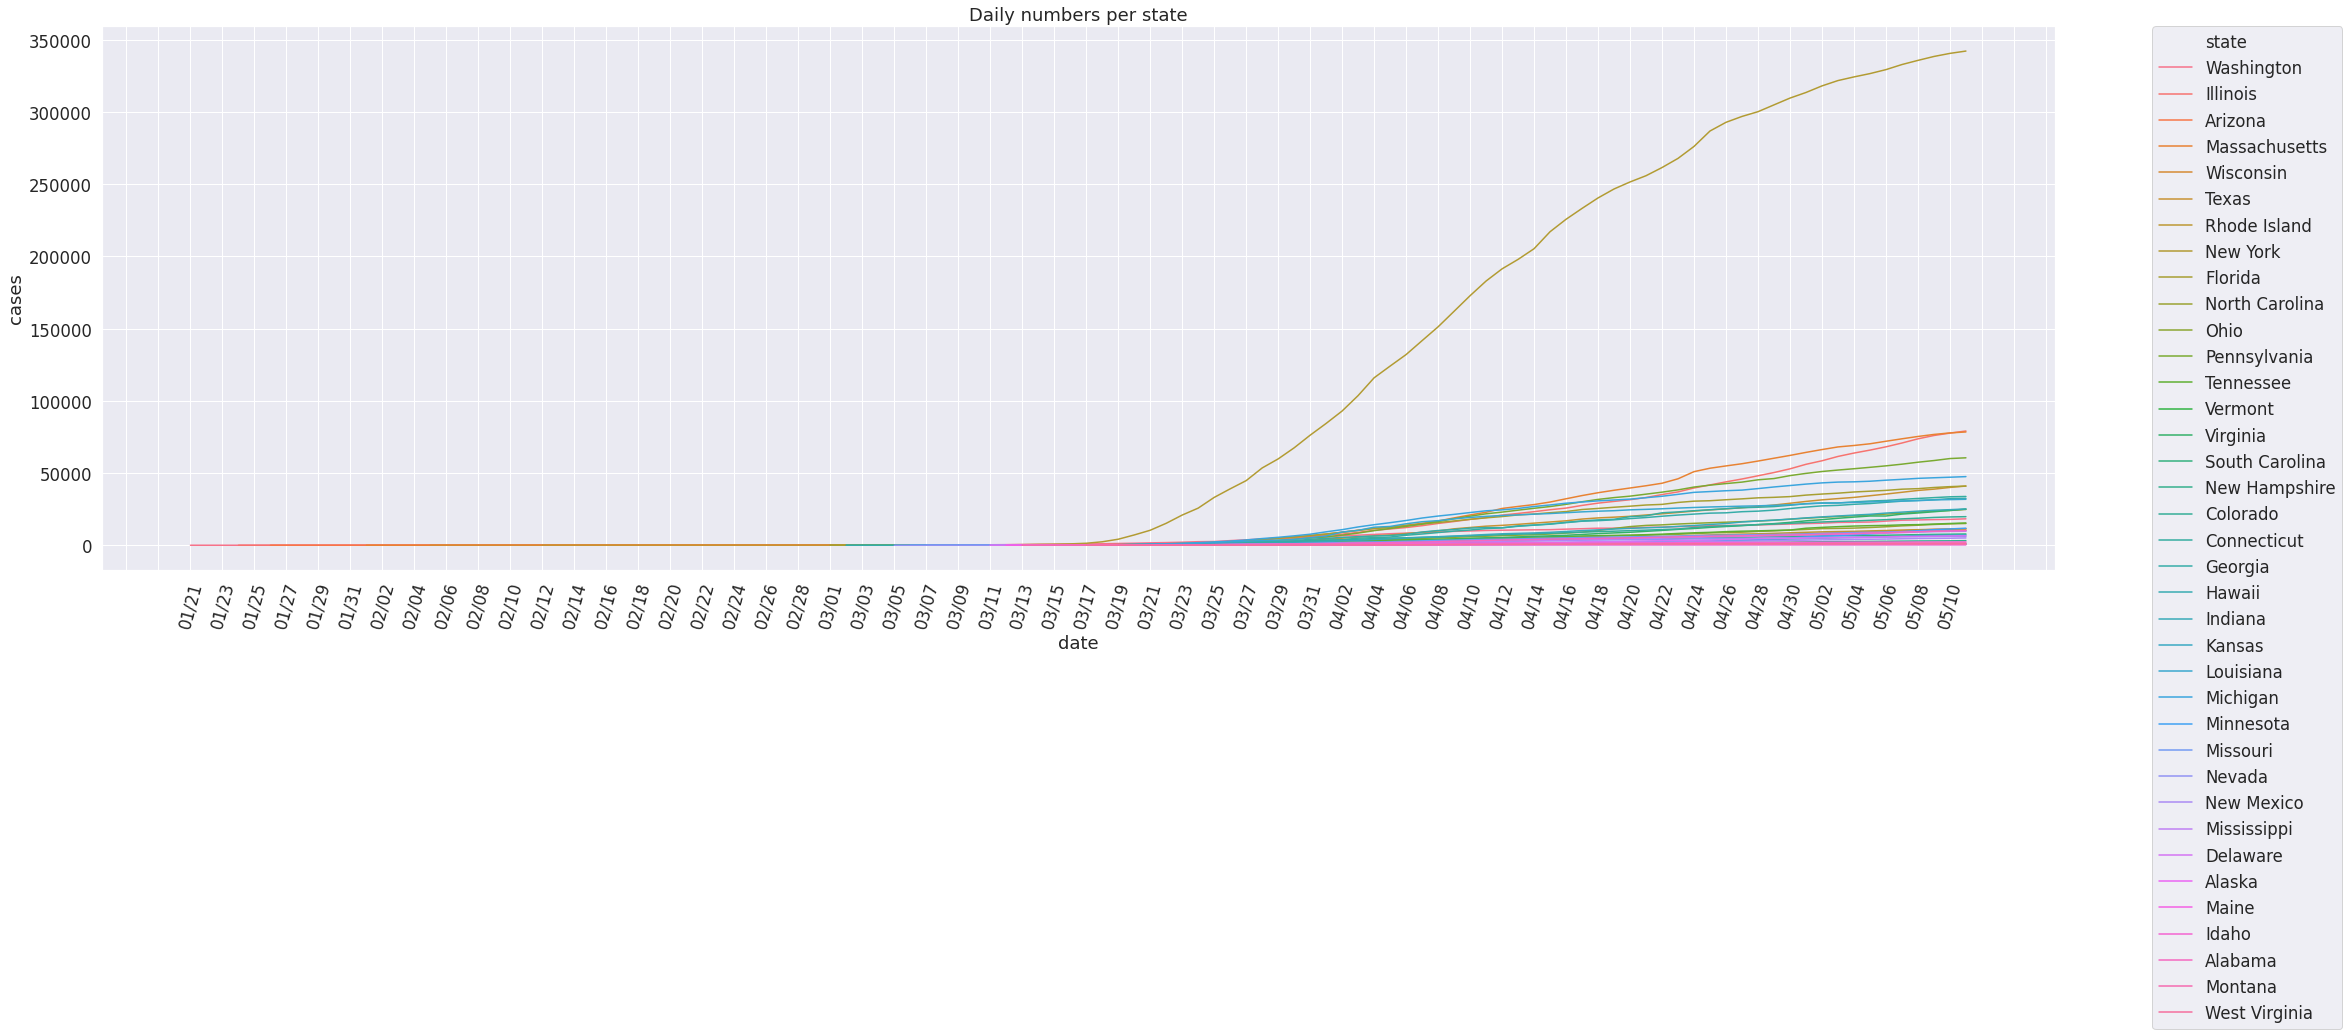

In [0]:
# Show timeline graph of cases
x_var= 'date'
y_var = 'cases'

plot_timeseries(df,x_var,y_var, x_interval=2)

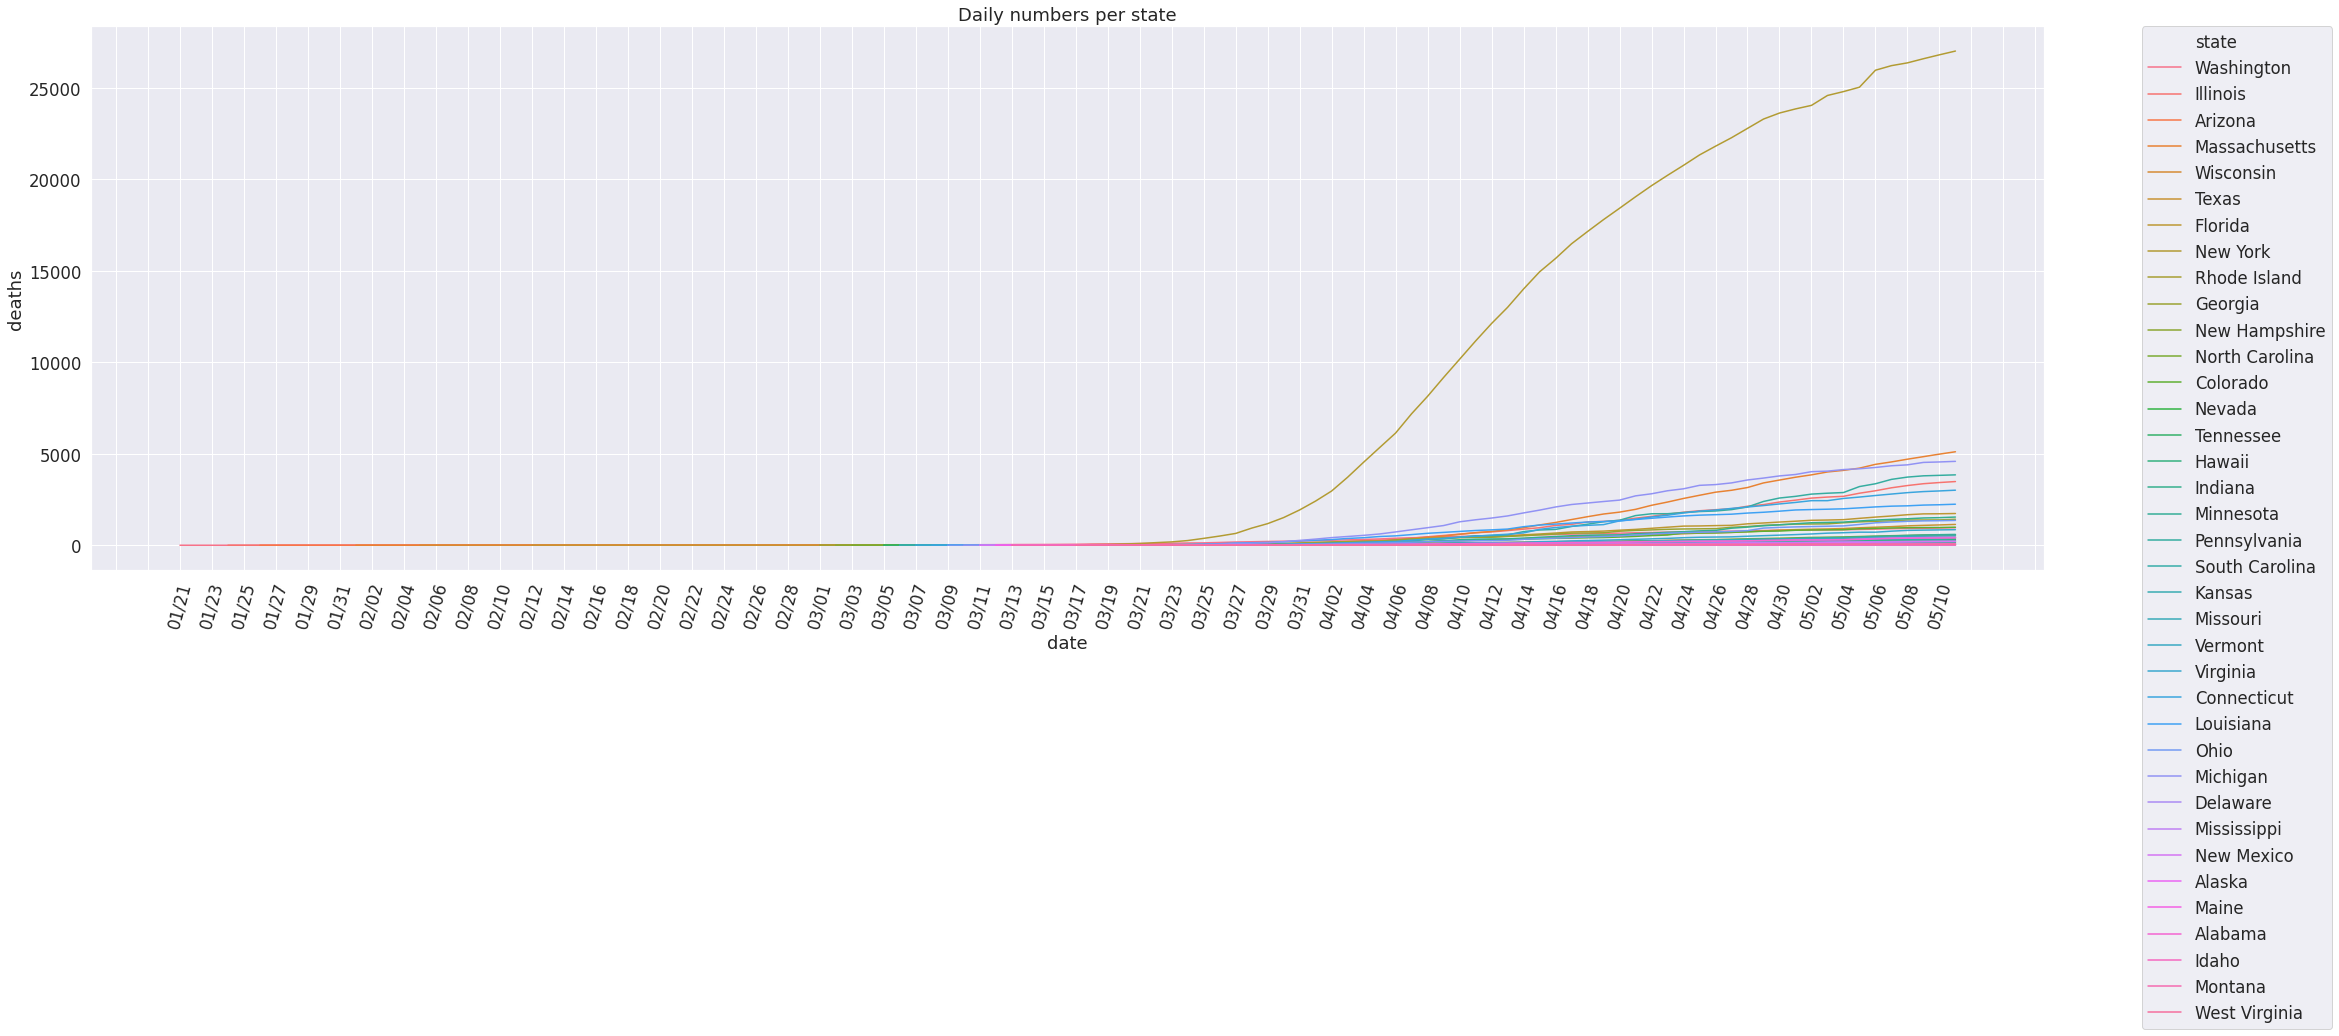

In [0]:
# Show timeline graph of cases
x_var= 'date'
y_var = 'deaths'

plot_timeseries(df,x_var,y_var, x_interval=2)

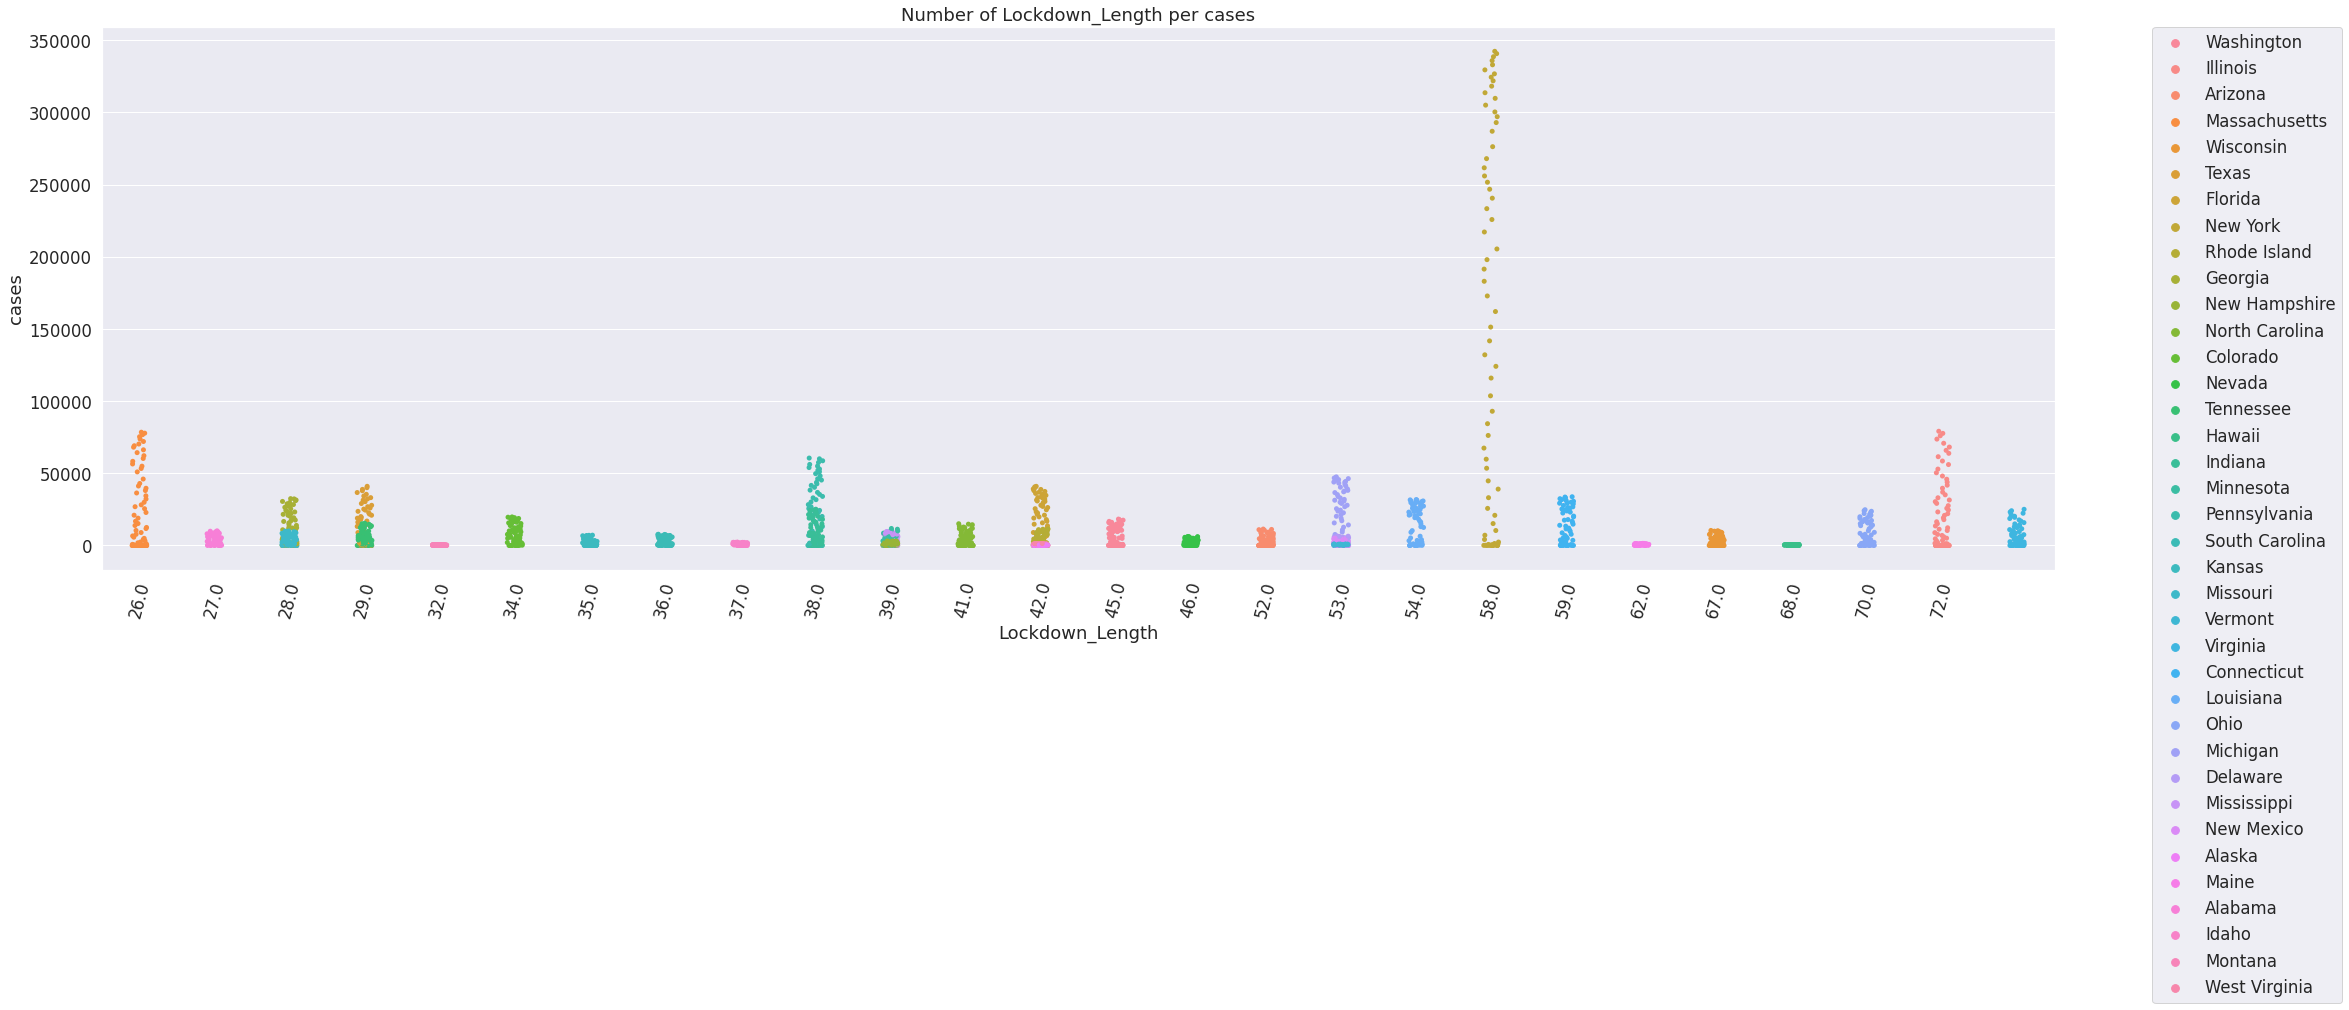

In [0]:
x_var = 'Lockdown_Length'
y_var = 'cases'

plot_scatter(df,x_var,y_var, x_interval=1,hue_var='state')

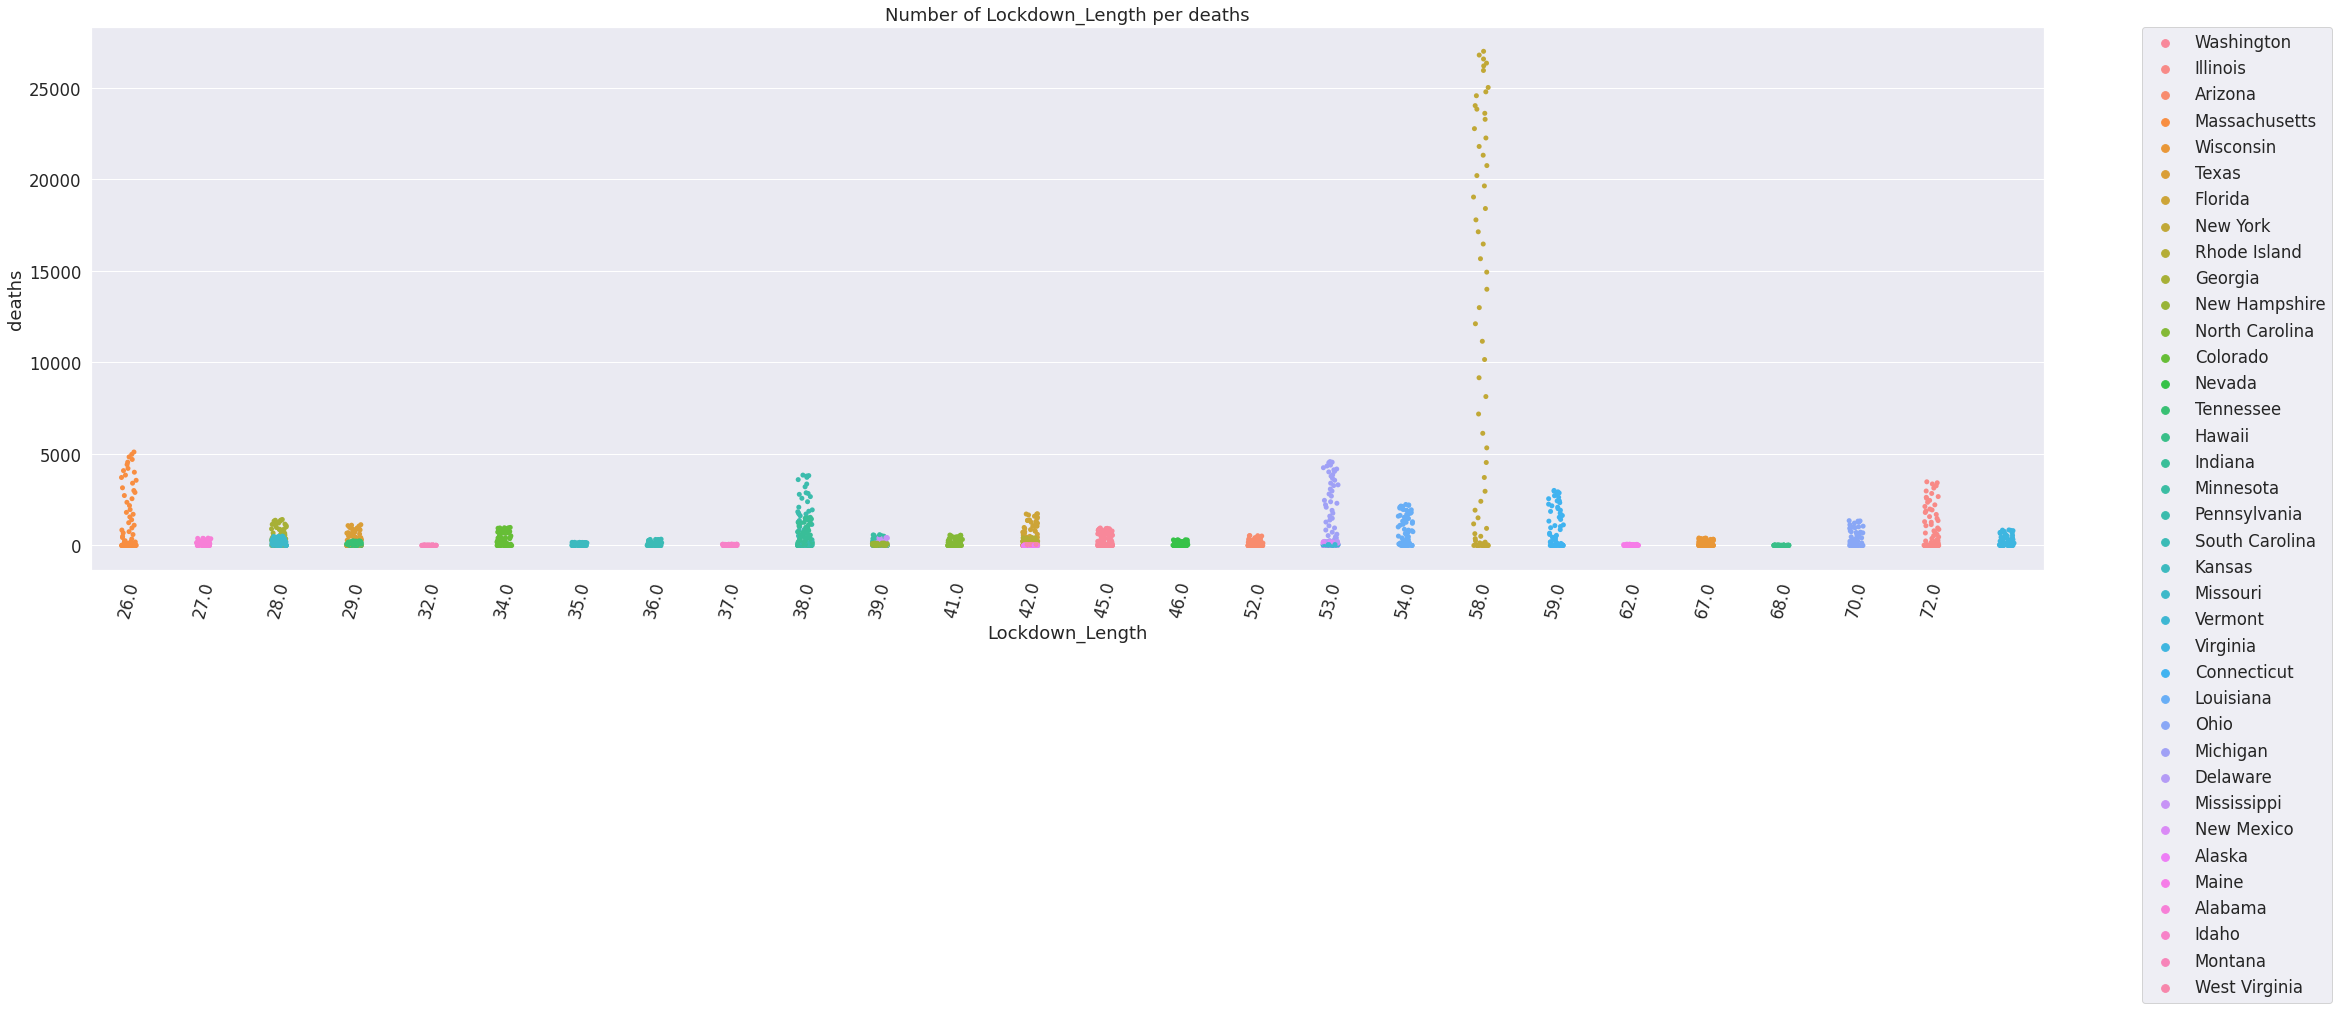

In [0]:
x_var = 'Lockdown_Length'
y_var = 'deaths'

plot_scatter(df,x_var,y_var, x_interval=1,hue_var='state')

## Normalized number of cases/deaths


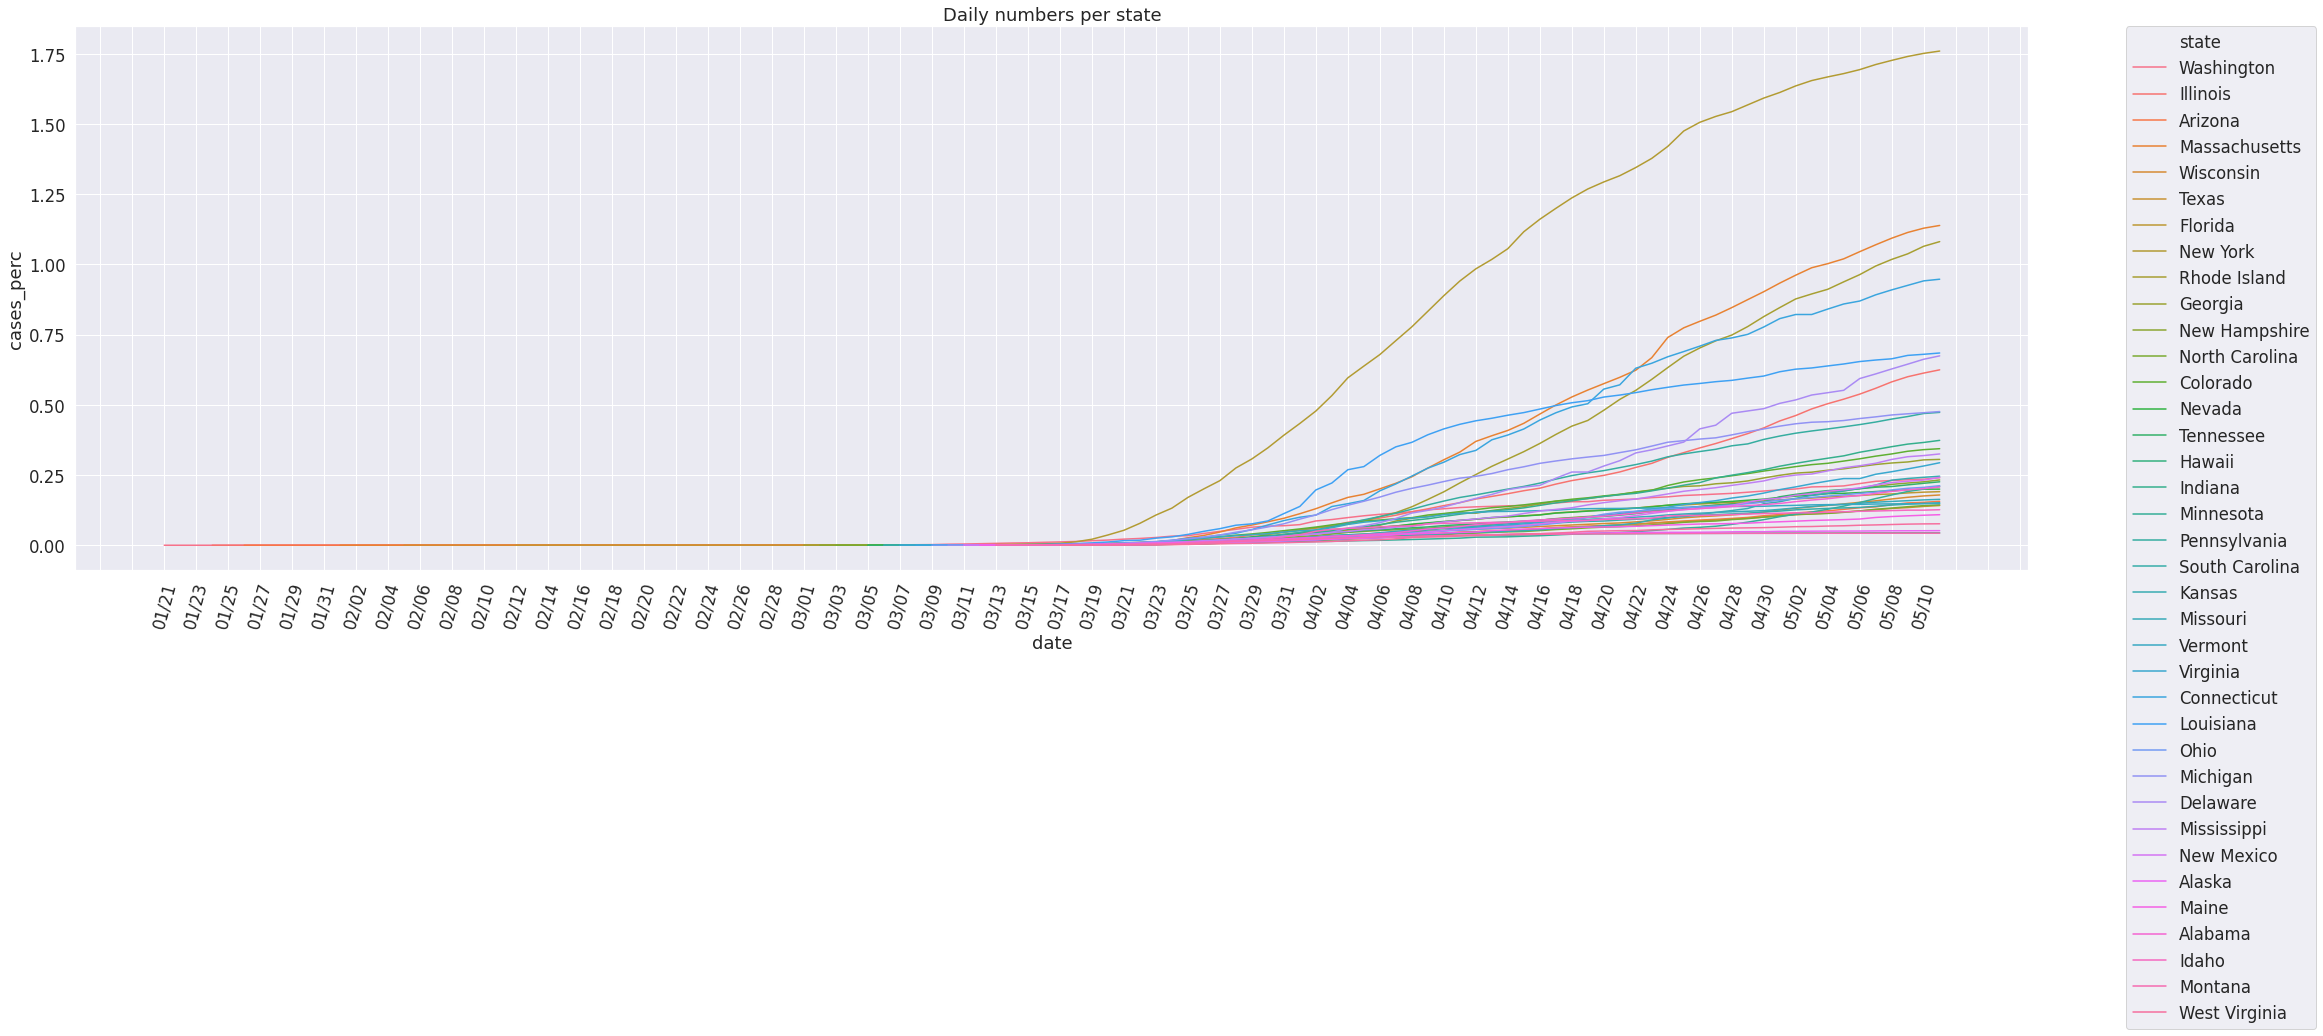

In [0]:
# Show timeline graph of cases
x_var = 'date'
y_var = 'cases_perc'

plot_timeseries(df,x_var,y_var, x_interval=2)

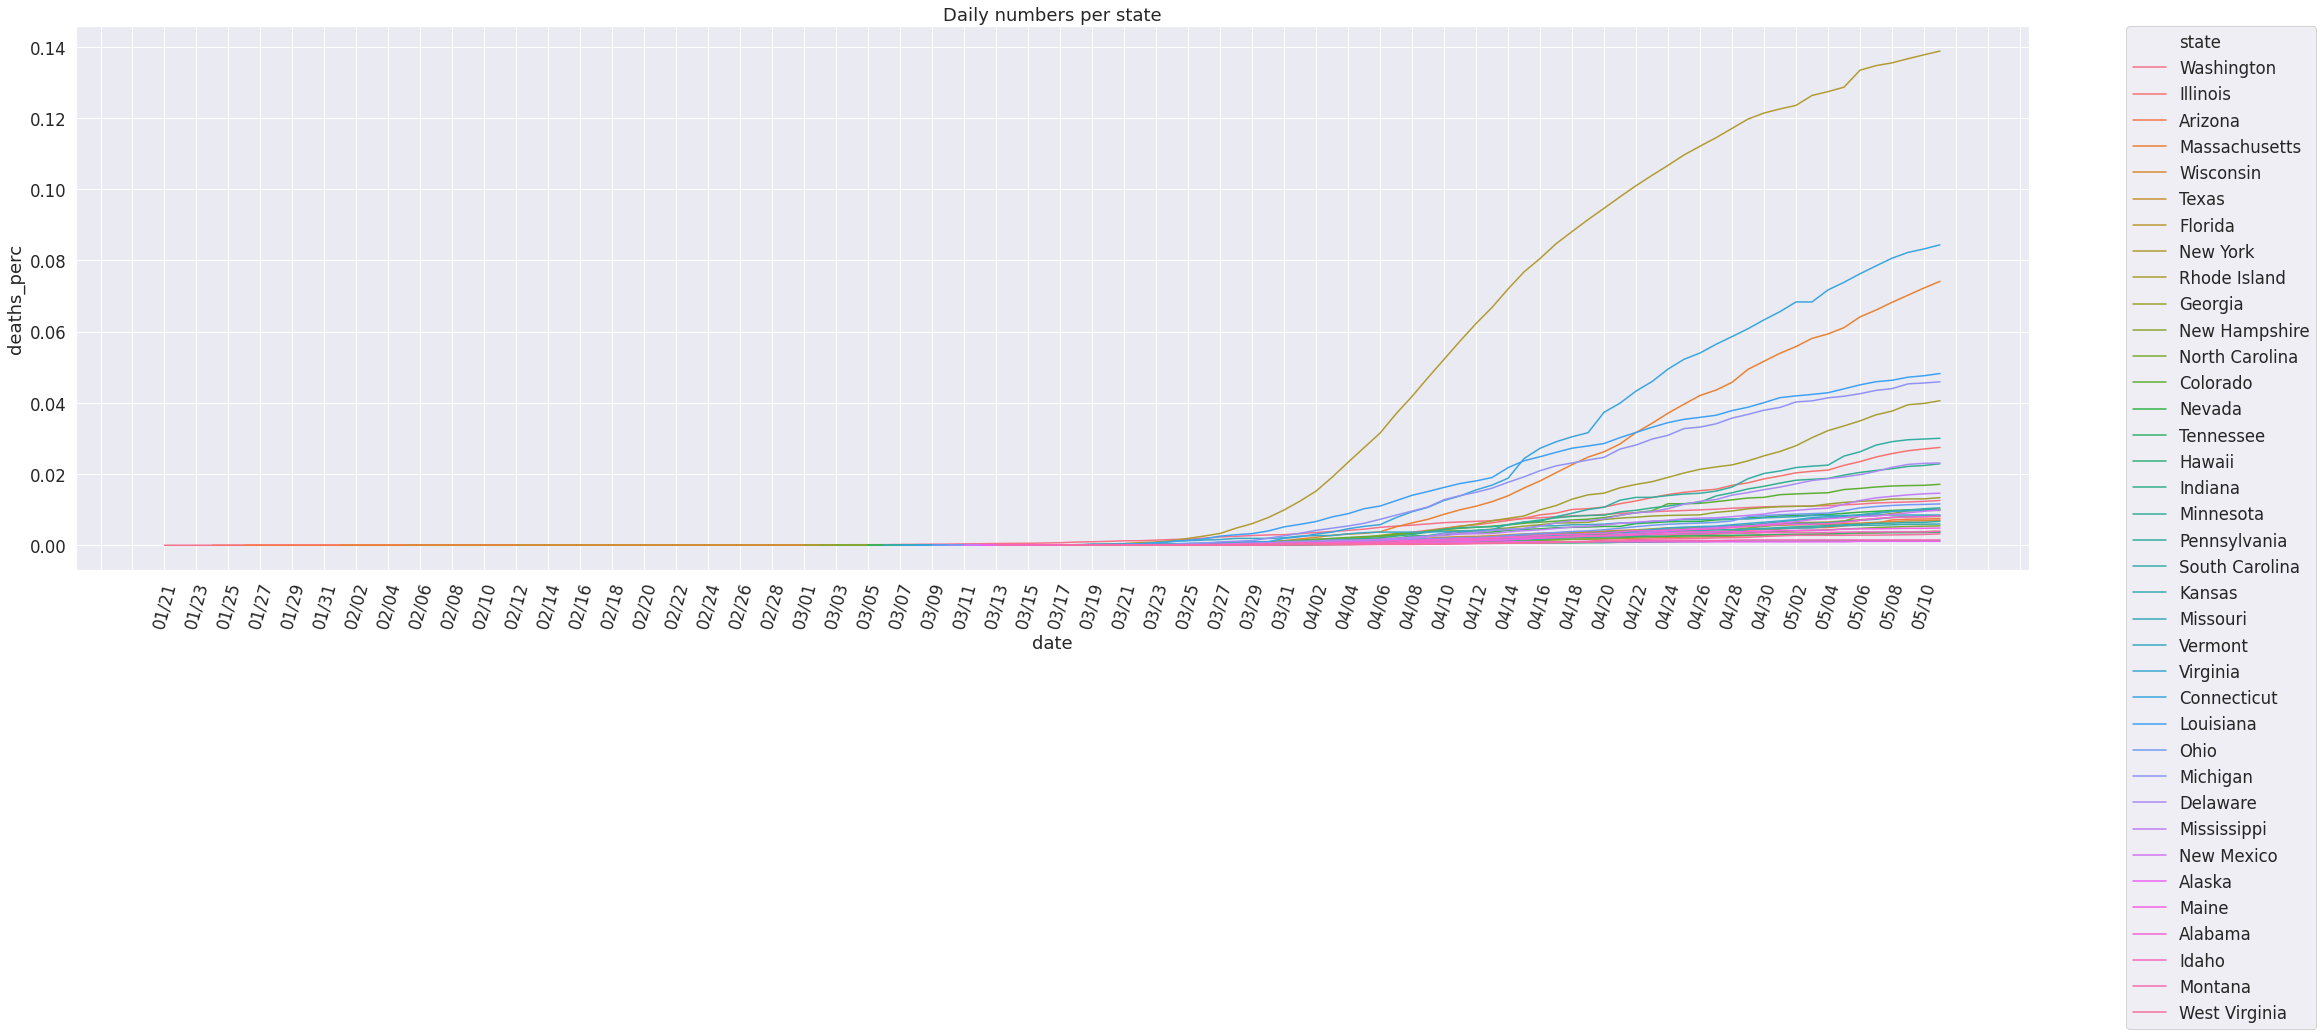

In [0]:
# Show timeline graph of cases
x_var = 'date'
y_var = 'deaths_perc'

plot_timeseries(df,x_var,y_var, x_interval=2)

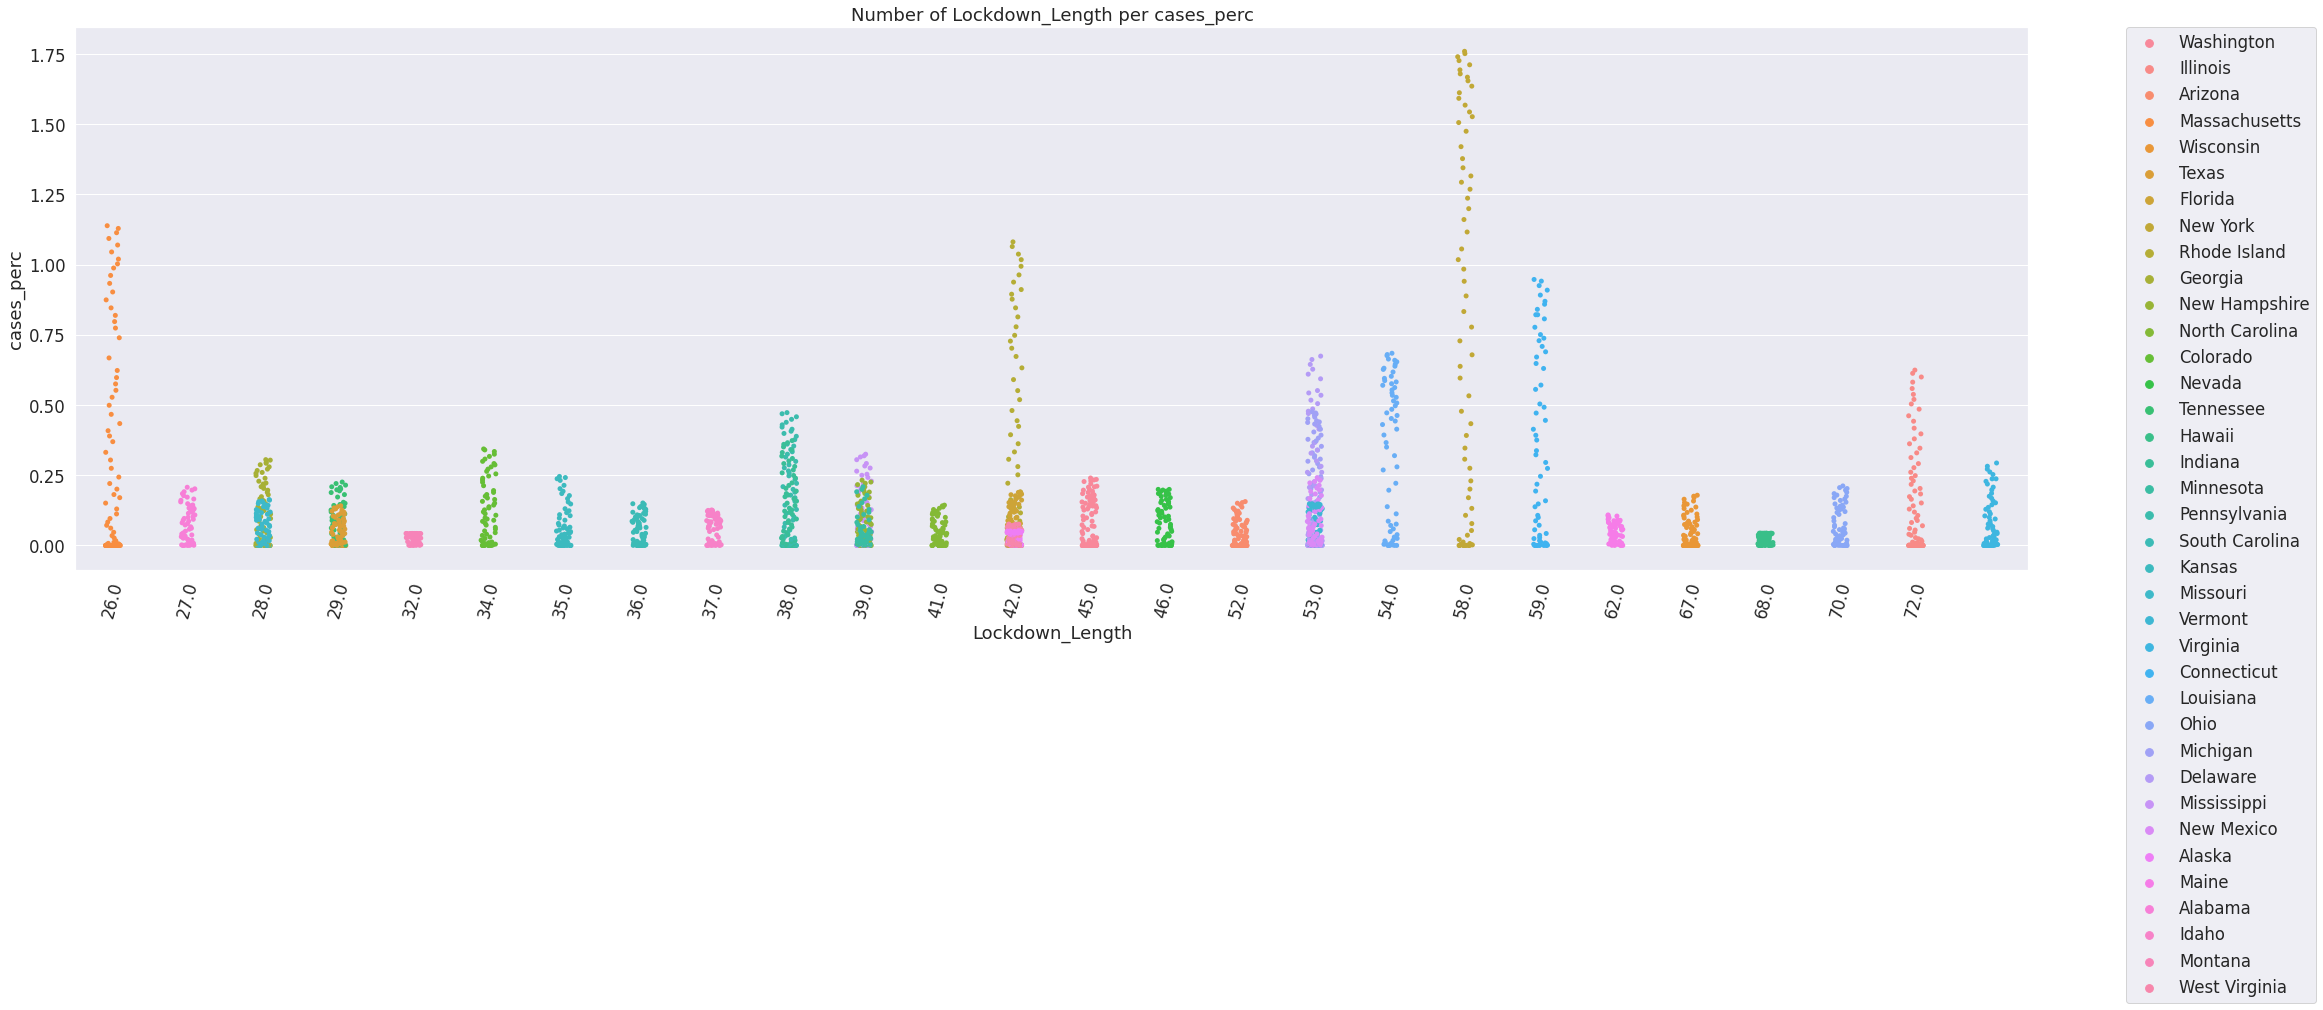

In [0]:
x_var = 'Lockdown_Length'
y_var = 'cases_perc'

plot_scatter(df,x_var,y_var, x_interval=1,hue_var='state')

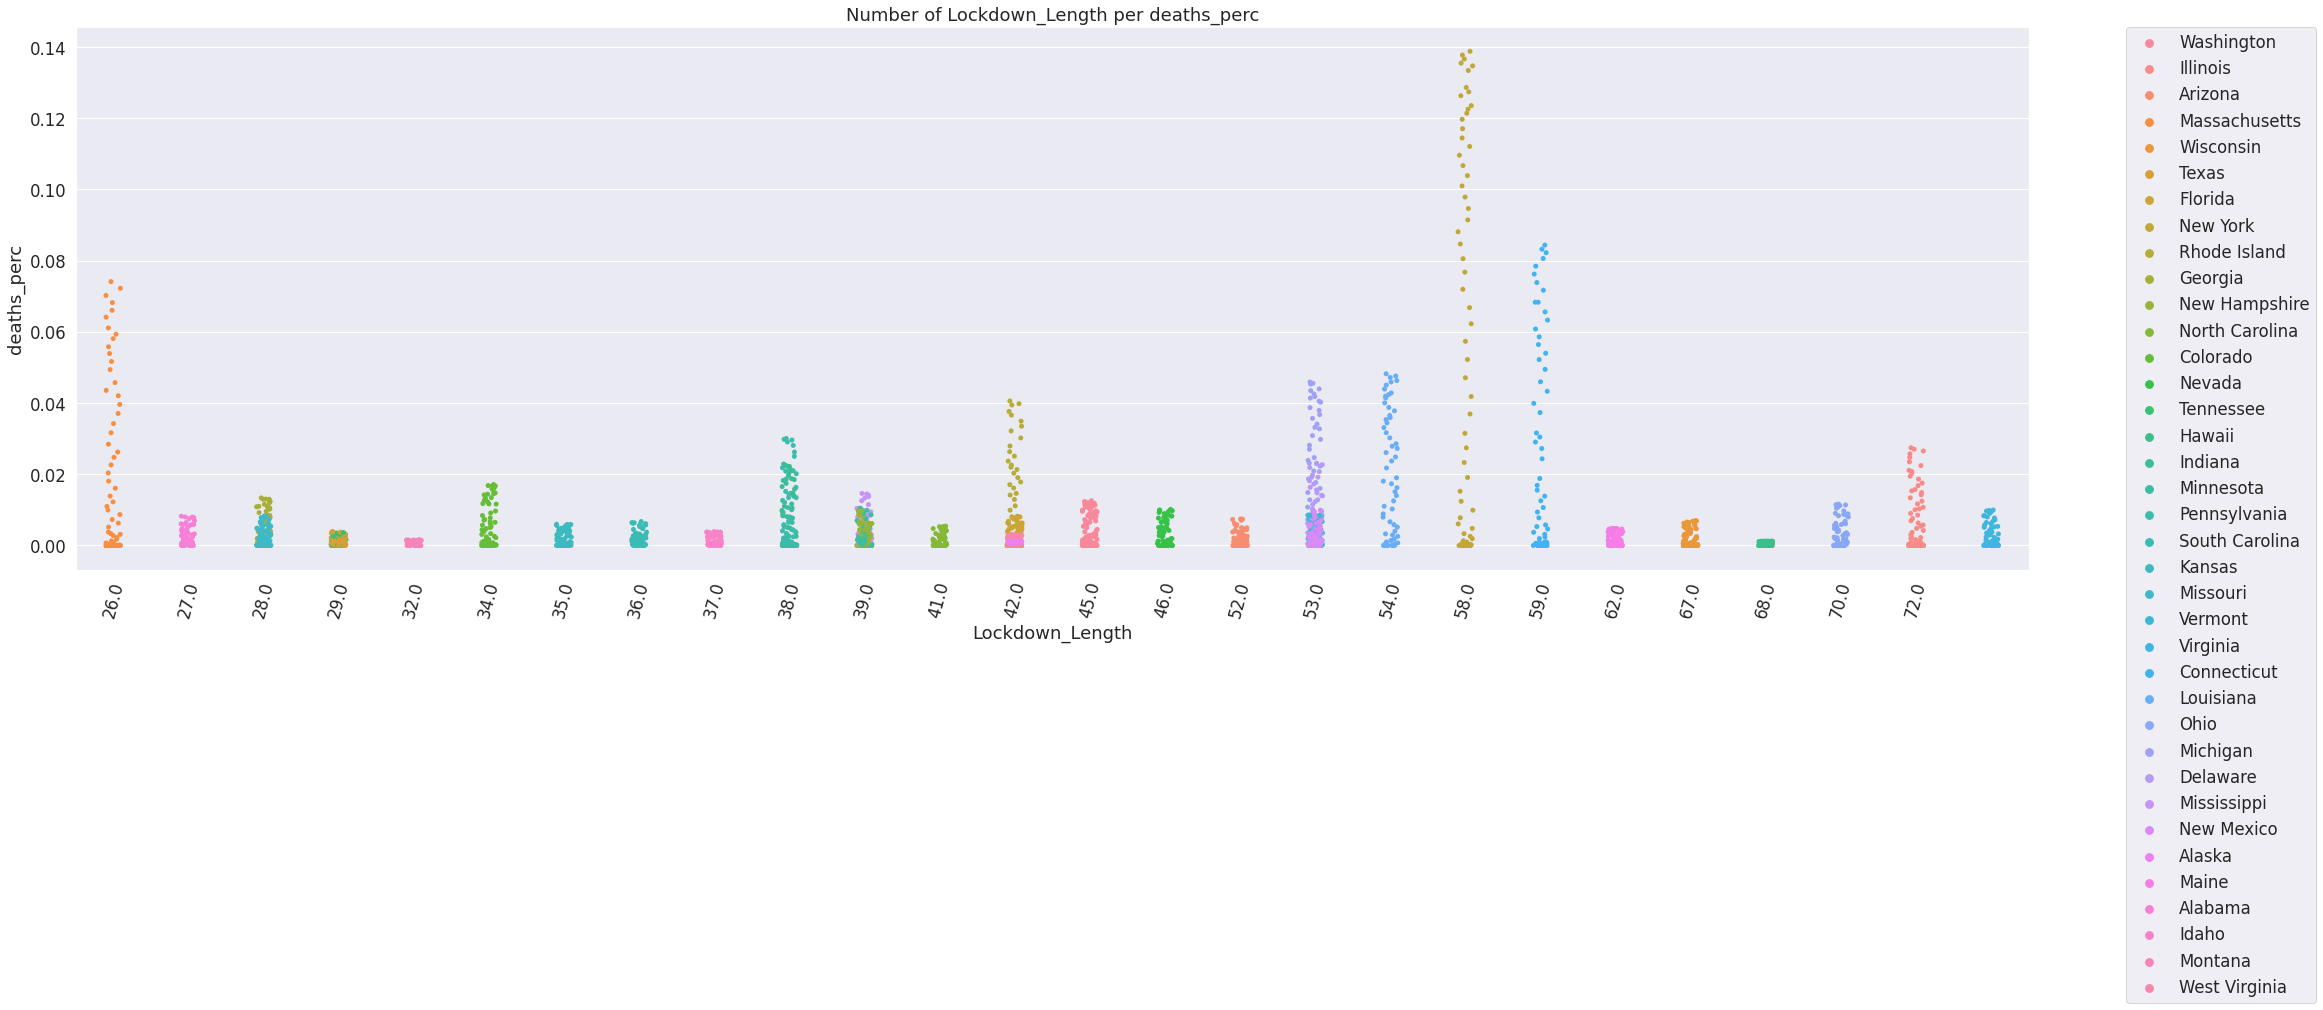

In [0]:
x_var = 'Lockdown_Length'
y_var = 'deaths_perc'

plot_scatter(df,x_var,y_var, x_interval=1,hue_var='state')

## Lockdown Start Analysis

### Data import and Wrangling

In [0]:
'''for lockdown start date analysis, remove only rows with NAs in Date_Start_of_lockdown'''

# check for null values.
print('Before removing NAs:')
print('\nNAs per column:\n', df_lock_start.isna().sum())

# Check dataset size.
n_rows_with_na = df_lock_start.shape[0]
print('\nNumber of columns:', df.shape[1])
print('Number of rows:', df_lock_start.shape[0],'\n')

# Remove rows with NAs
df_lock_start = df_lock_start[df_lock_start['Date_Start_of_Lockdown'].notna()]

# Check number of rows again, after removal.
print('\nAfter removing NAs:')
print('\nNumber of rows:', df_lock_start.shape[0])
print('Number of rows removed:', n_rows_with_na-df_lock_start.shape[0])

# check for null values again.
print('\nNAs per column:\n', df_lock_start.isna().sum())

# Sort by start of lockdown date
df_lock_start.sort_values(by='Date_Start_of_Lockdown',inplace=True)

Before removing NAs:

NAs per column:
 index                                0
date                                 0
state                                0
cases                                0
deaths                               0
Date_Start_of_Lockdown             543
Date_End_of_Lockdown               929
Lockdown_Length                    929
Noramliztion factor (per 1,000)      0
cases_perc                           0
deaths_perc                          0
before_lock-down                     0
State (Lock-down Start)              0
dtype: int64

Number of columns: 11
Number of rows: 3576 


After removing NAs:

Number of rows: 3033
Number of rows removed: 543

NAs per column:
 index                                0
date                                 0
state                                0
cases                                0
deaths                               0
Date_Start_of_Lockdown               0
Date_End_of_Lockdown               386
Lockdown_Length                  

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [0]:
# Check that states with start, but not end date are kept in the dataframe.
df_lock_start[df_lock_start['Date_End_of_Lockdown'].isna()].head()

index   date  ... before_lock-down  State (Lock-down Start)
265     254  03/02  ...             True       California (03/19)
956     930  03/20  ...            False       California (03/19)
3456   3430  05/09  ...            False       California (03/19)
611     584  03/13  ...             True       California (03/19)
2356   2330  04/17  ...            False       California (03/19)

[5 rows x 13 columns]

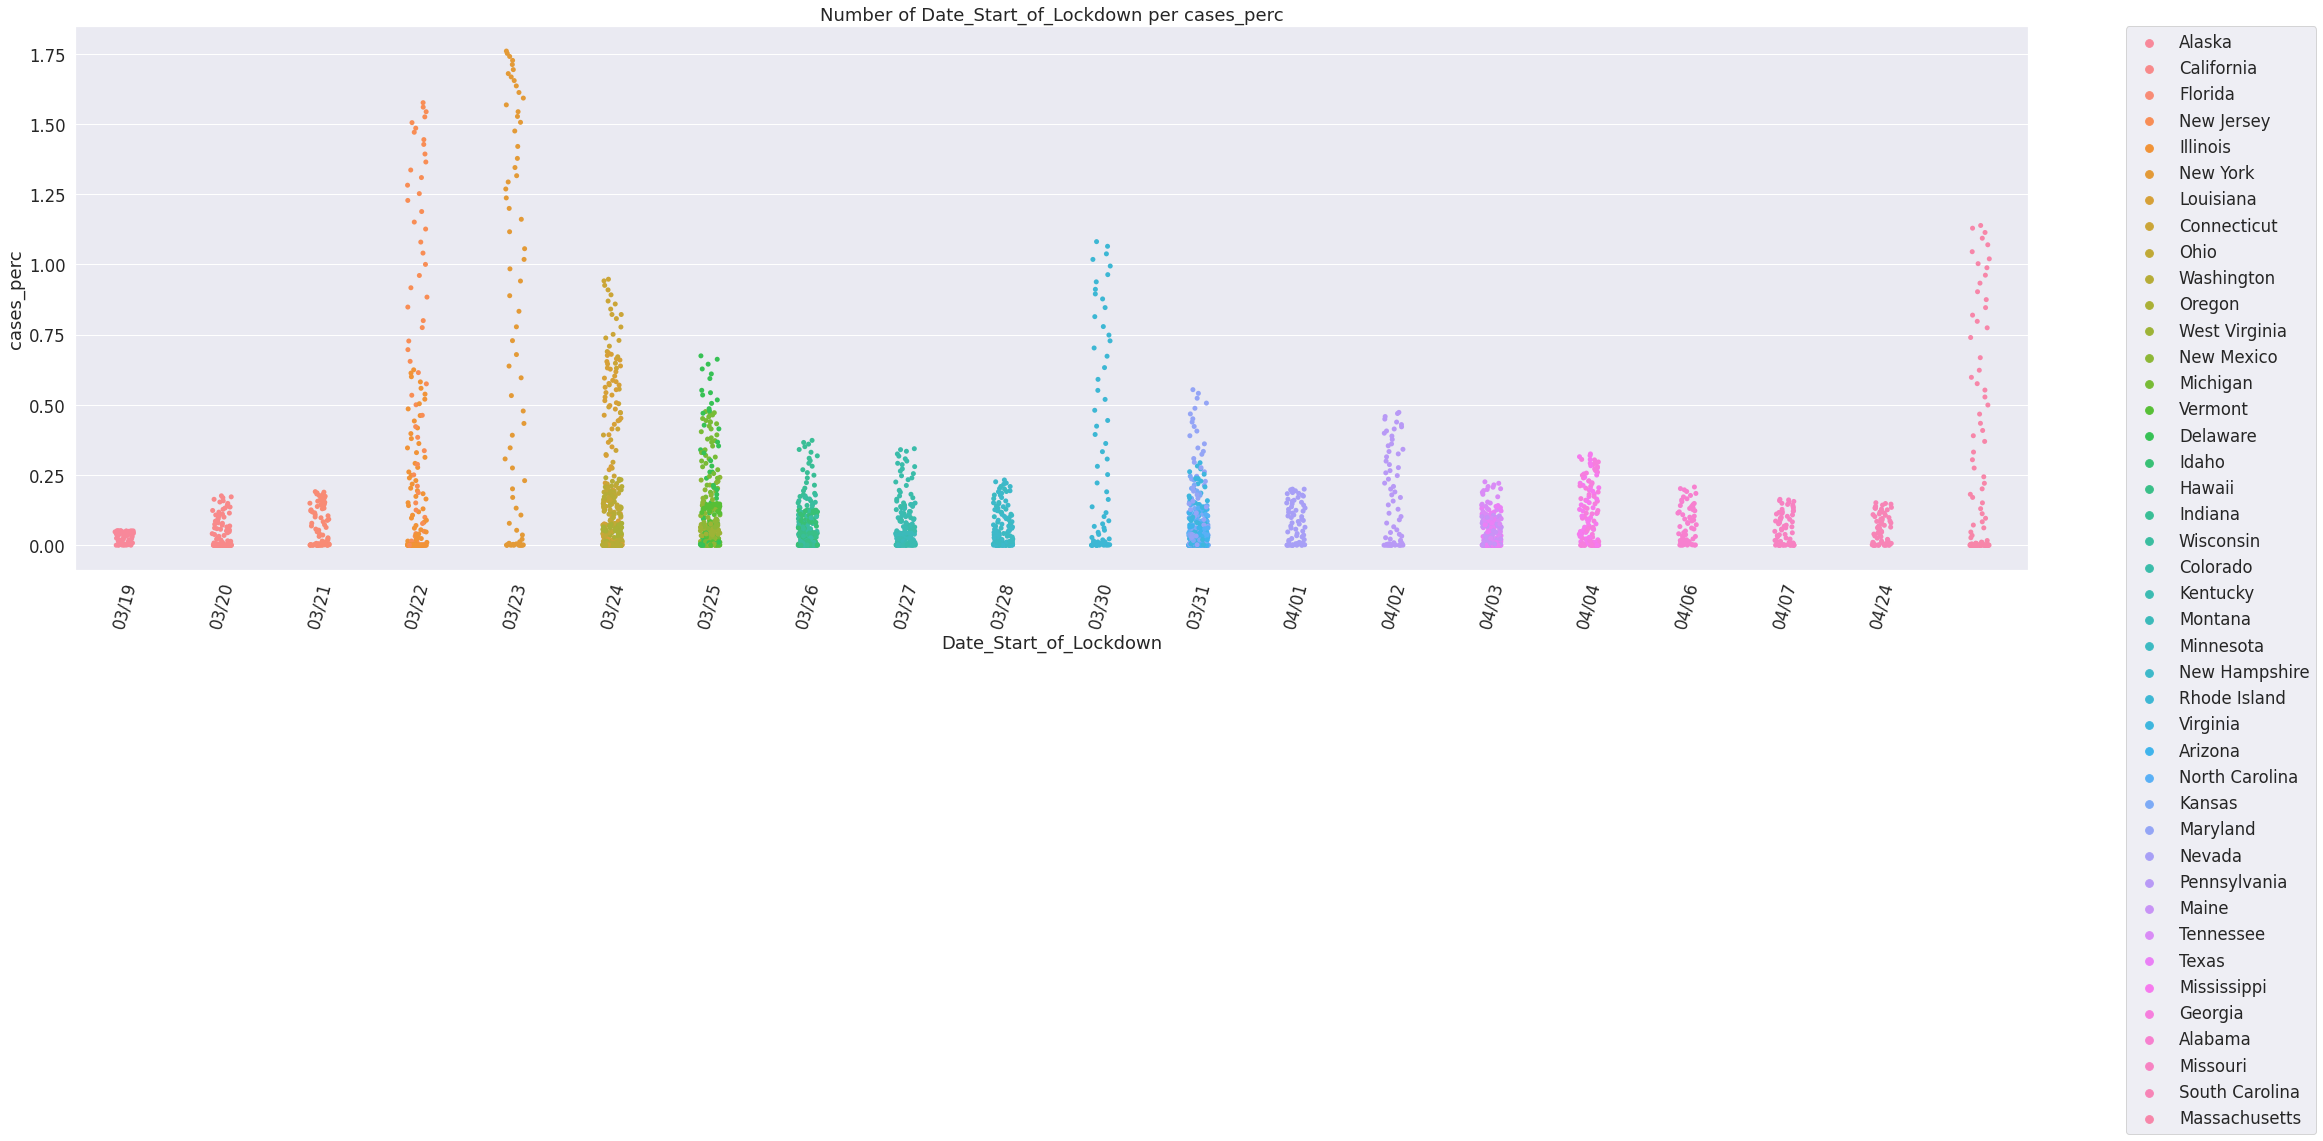

In [0]:
x_var = 'Date_Start_of_Lockdown'
y_var = 'cases_perc'

plot_scatter(df_lock_start,x_var,y_var, x_interval=1,hue_var='state')

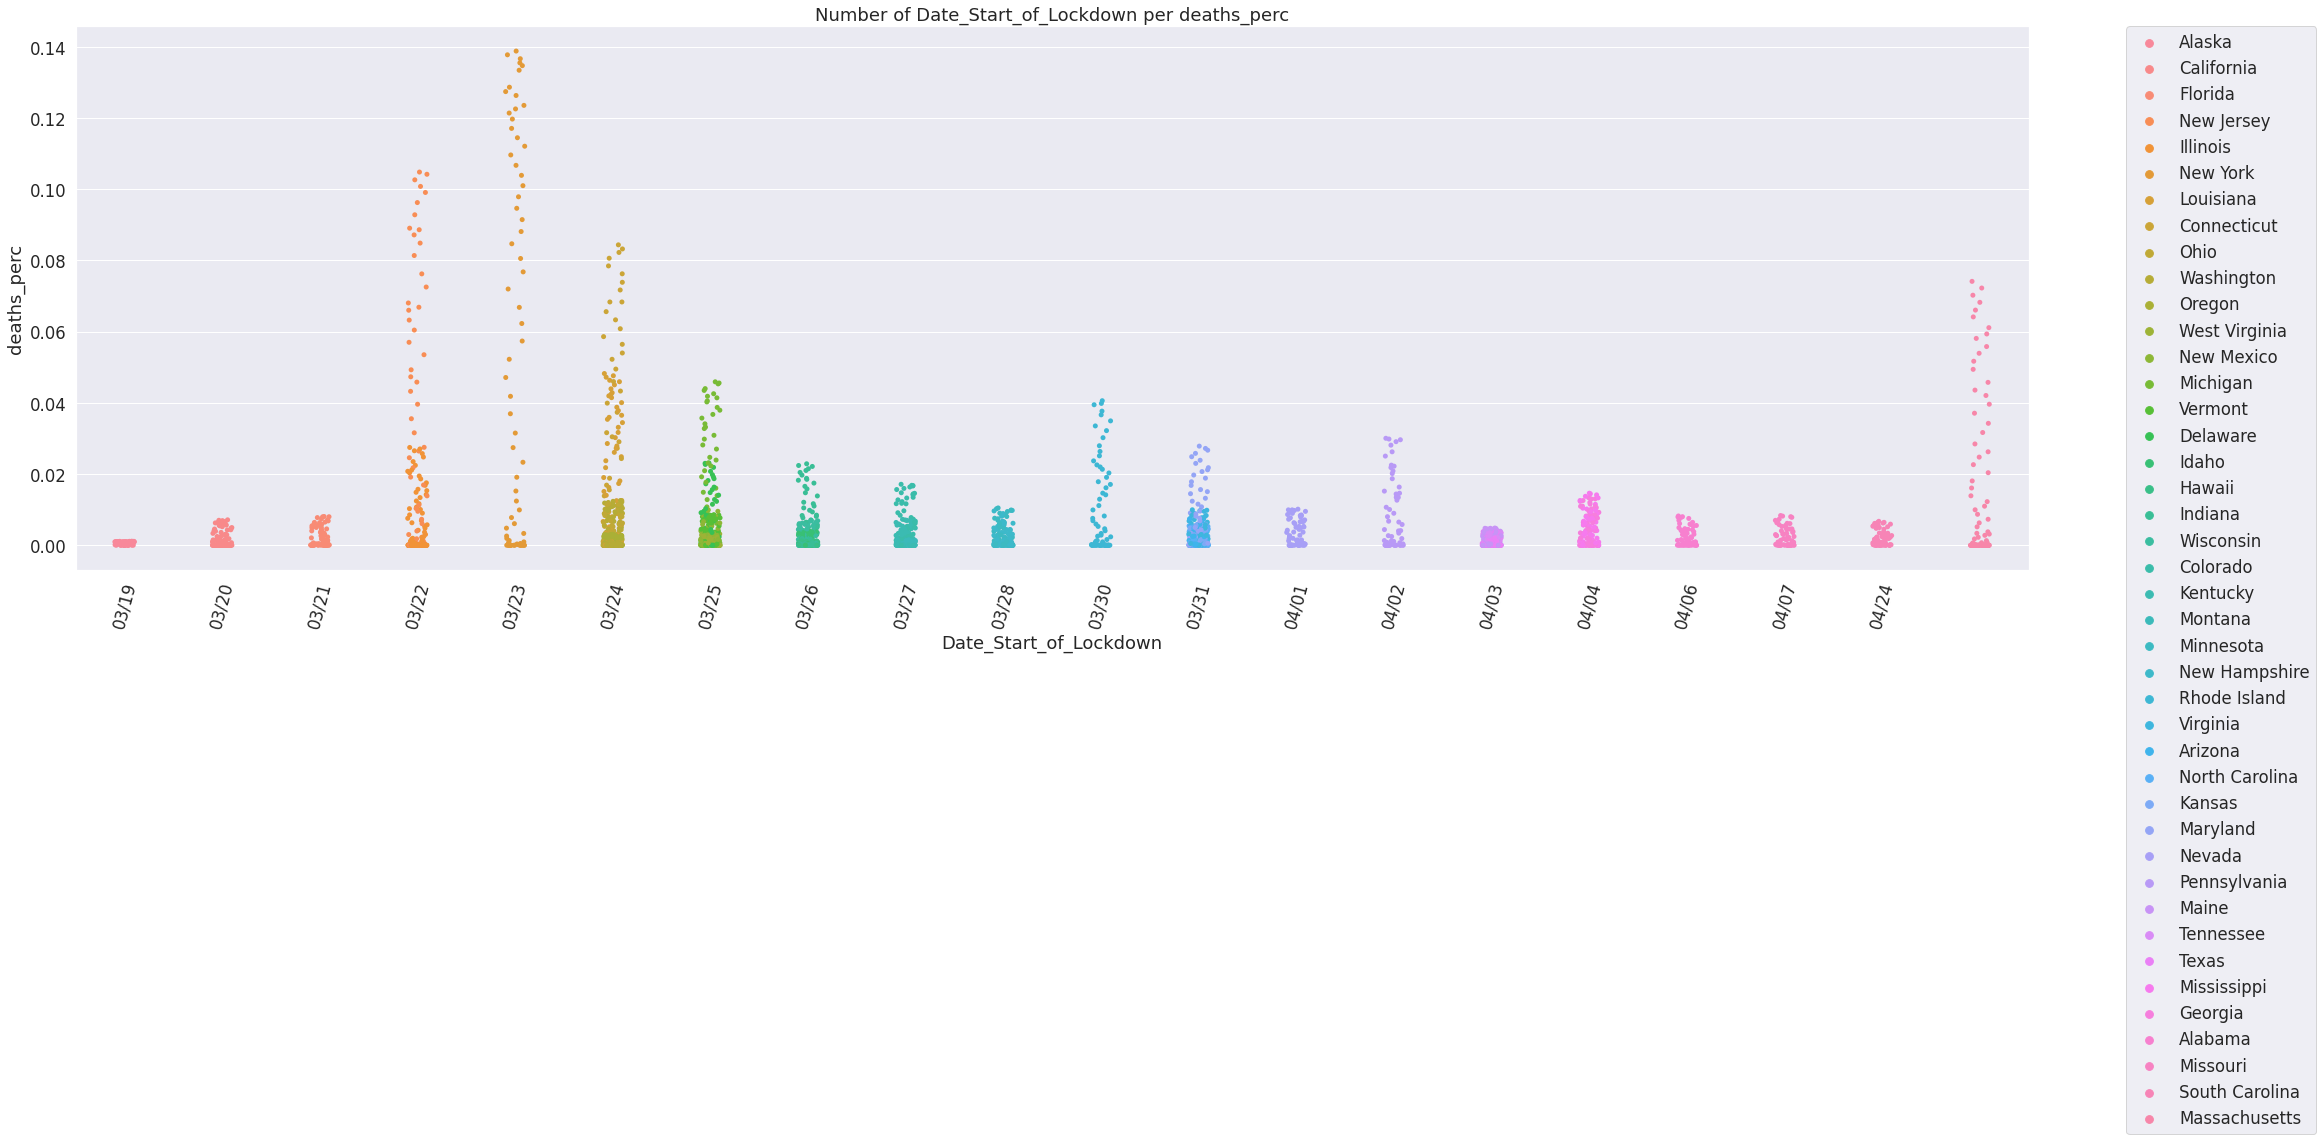

In [0]:
x_var = 'Date_Start_of_Lockdown'
y_var = 'deaths_perc'

plot_scatter(df_lock_start,x_var,y_var, x_interval=1,hue_var='state')

## State Means Analysis

In [0]:
# Upload data file - lockdown data.
uploaded_lockdown = files.upload()

Saving Lockdown Data.csv to Lockdown Data.csv


In [0]:
# Read into a data frame.
df_lockdown = pd.read_csv("Lockdown Data.csv")

In [0]:
# change date format to DD/MM for easier vizualzition (as year is always 2020).
df_lockdown['Date_Start_of_Lockdown'] = pd.to_datetime(df_lockdown['Date_Start_of_Lockdown'])
df_lockdown['Date_Start_of_Lockdown'] = df_lockdown['Date_Start_of_Lockdown'].dt.strftime('%m/%d')
df_lockdown['Date_End_of_Lockdown'] = pd.to_datetime(df_lockdown['Date_End_of_Lockdown'])
df_lockdown['Date_End_of_Lockdown'] = df_lockdown['Date_End_of_Lockdown'].dt.strftime('%m/%d')

In [0]:
# Merge lockdown data with mean valujes of states.
df_means = df.groupby('state').mean().merge(df_lockdown, how='inner', on='state')
df_sds = df.groupby('state').std().merge(df_lockdown, how='inner', on='state')

# Sort by start dates
df_means.sort_values(by='Lockdown_Length',inplace=True)
# df.reset_index(inplace=True)

In [0]:
# Add state (lockdown length/start) column
df_means['State (Lock-down Length)'] = df_means['state'].astype(str) + ' (' + df_means['Lockdown_Length'].astype(int).astype(str) + ')'
# df_sds['State (Lock-down Length)'] = df_means['State (Lock-down Length)']

df_means['State (Lock-down Start)'] = df_means['state'].astype(str) + ' (' + df_means['Date_Start_of_Lockdown'].astype(str) + ')'

In [0]:
# Check merged df.
df_means.head()

state        index  ...  State (Lock-down Length)  State (Lock-down Start)
15  Massachusetts  1309.613861  ...        Massachusetts (24)    Massachusetts (04/24)
0         Alabama  2051.166667  ...              Alabama (26)          Alabama (04/04)
7         Georgia  1798.774648  ...              Georgia (27)          Georgia (04/03)
19       Missouri  1927.833333  ...             Missouri (27)         Missouri (04/06)
31          Texas  1478.877778  ...                Texas (28)            Texas (04/02)

[5 rows x 12 columns]

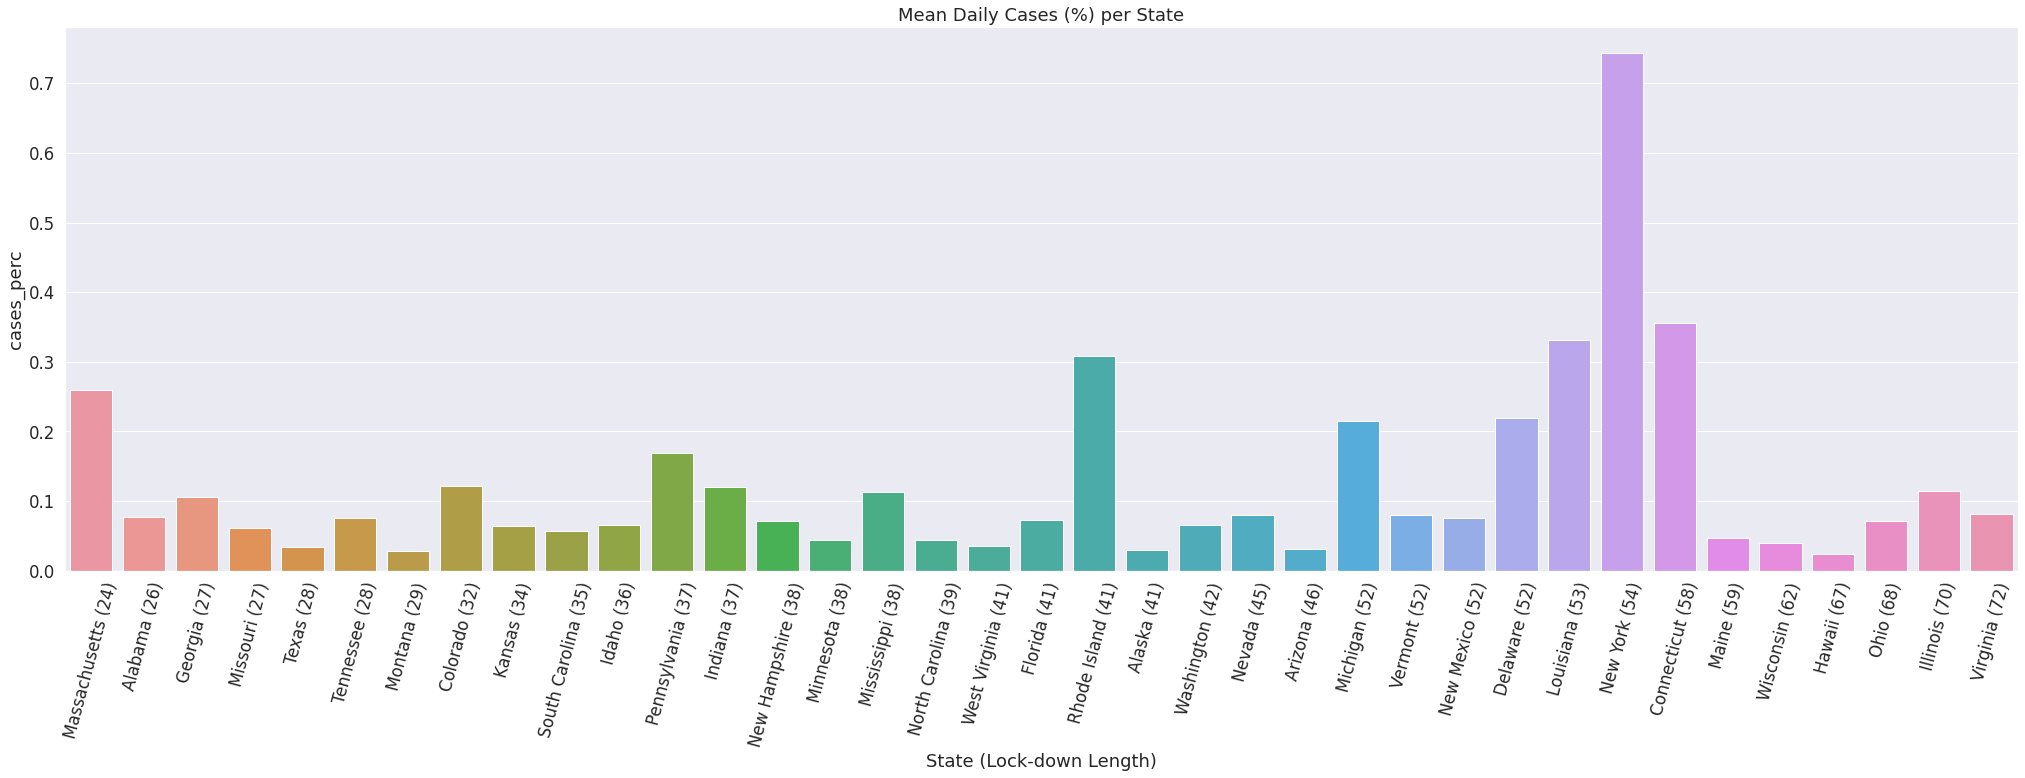

In [0]:
x_var = 'State (Lock-down Length)'
y_var = 'cases_perc'

title = 'Mean Daily Cases (%) per State'
df_means.sort_values(by='Lockdown_Length',inplace=True)
plot_barplots(df_means,x_var,y_var,title=title)

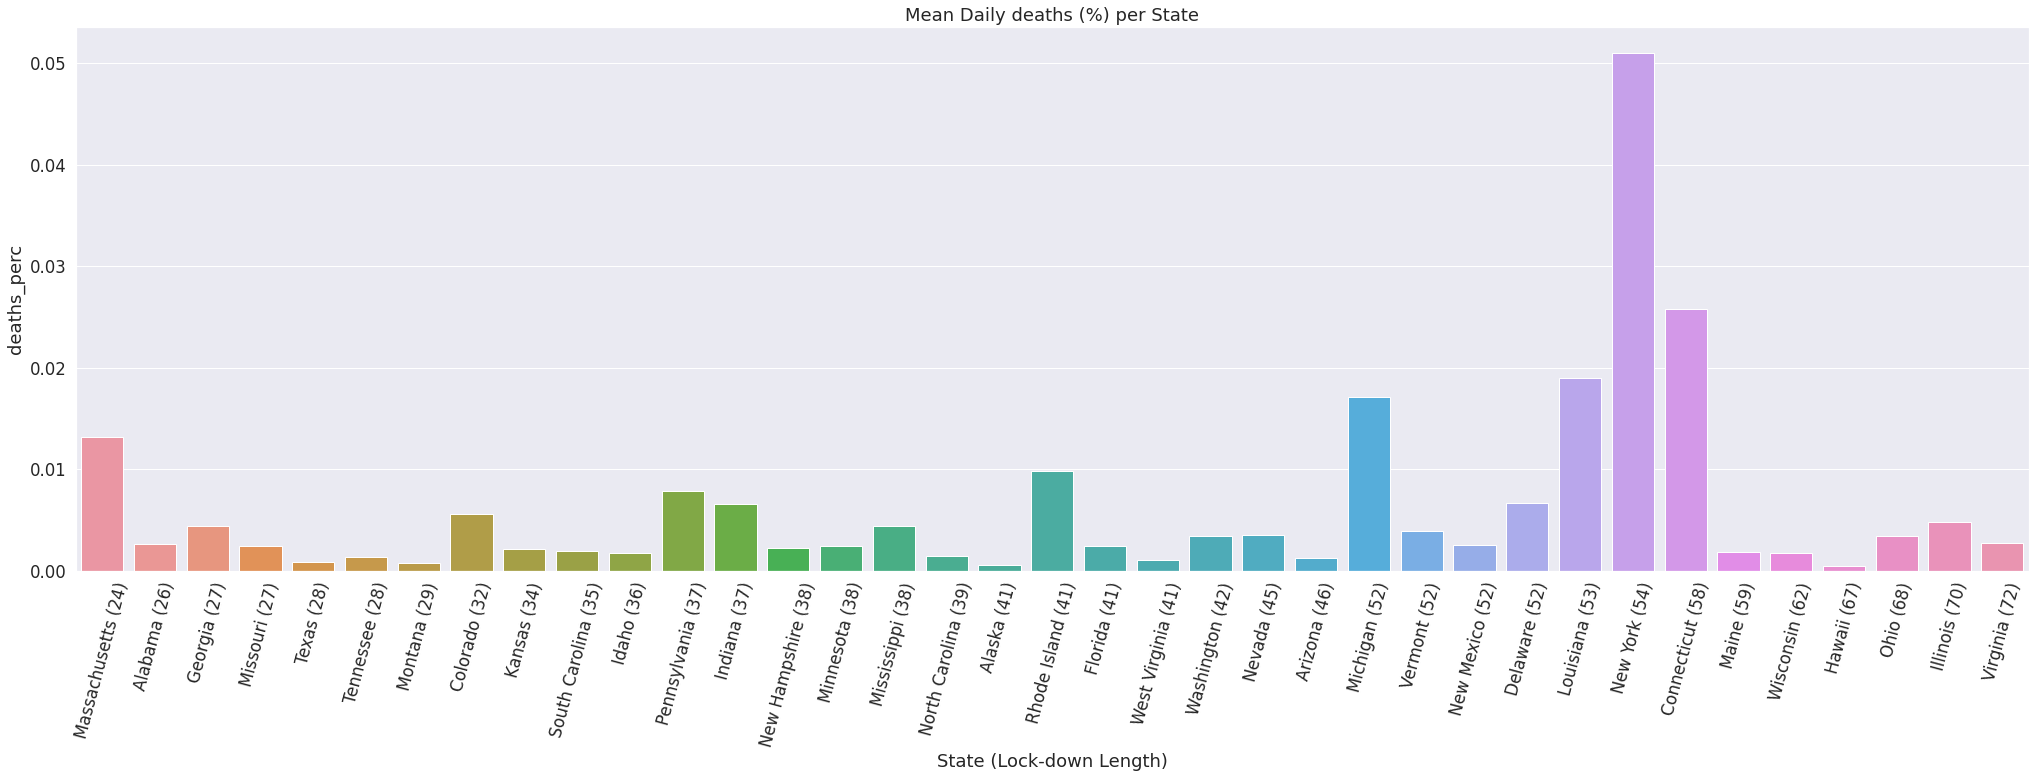

In [0]:
x_var = 'State (Lock-down Length)'
y_var = 'deaths_perc'

title = 'Mean Daily deaths (%) per State'
df_means.sort_values(by='Lockdown_Length',inplace=True)
plot_barplots(df_means,x_var,y_var,title=title)

In [0]:
# create Cases/Deaths Ratio column
df_means['Cases/Deaths Ratio'] = df_means['cases']/df_means['deaths']

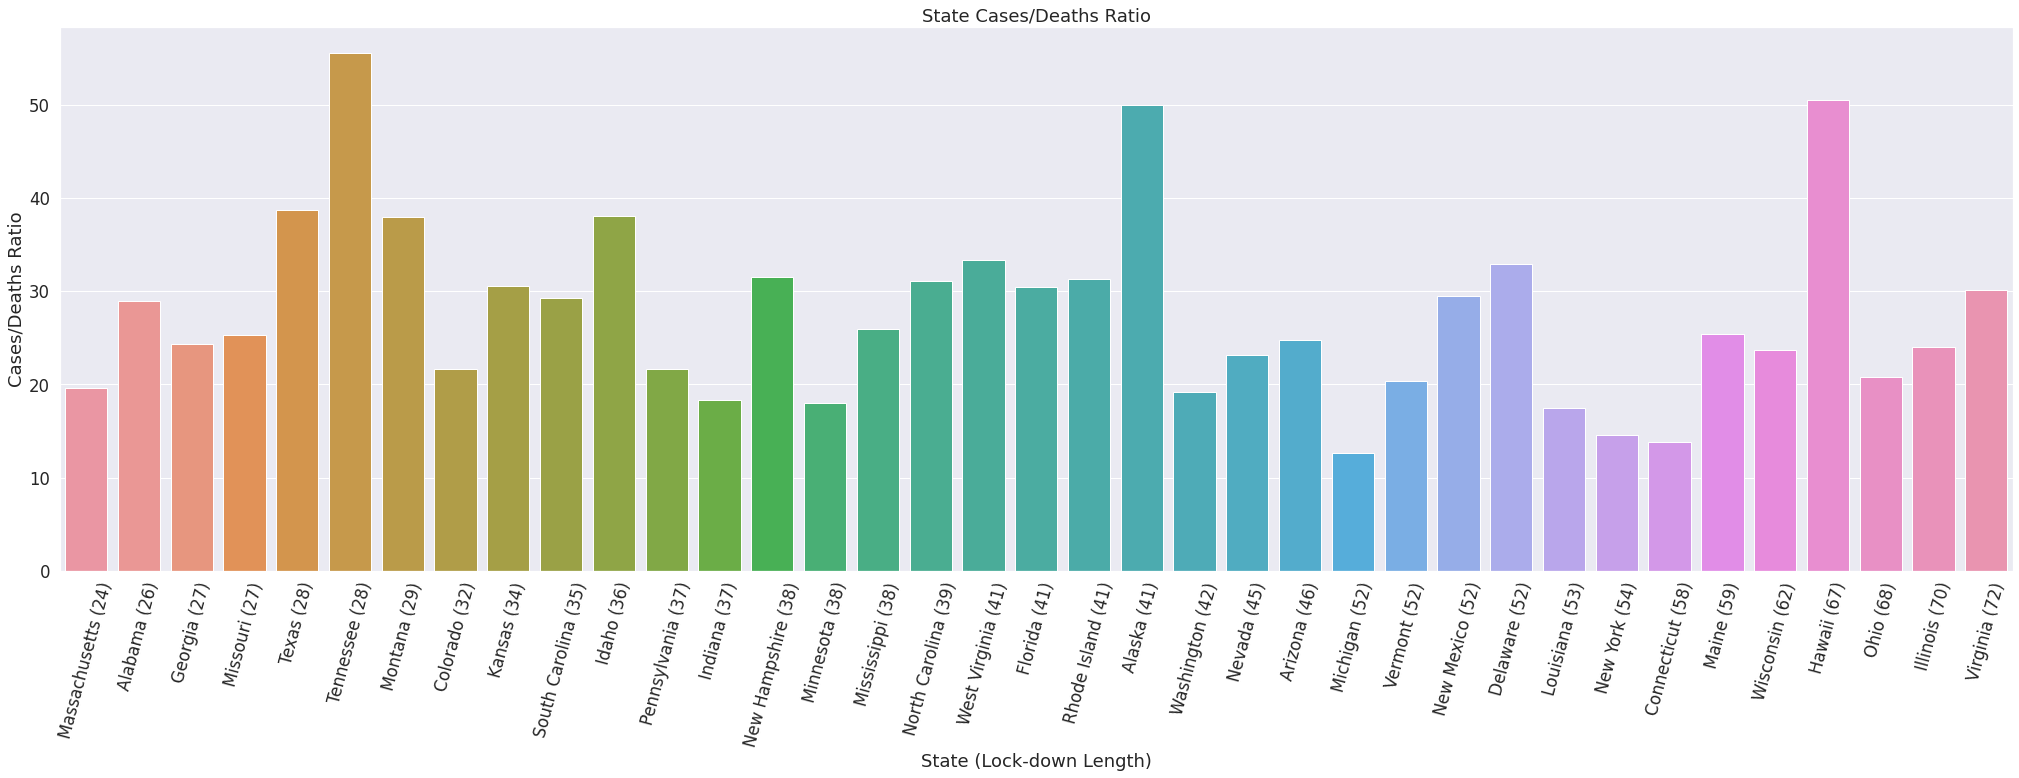

In [0]:
x_var = 'State (Lock-down Length)'
y_var = 'Cases/Deaths Ratio'

title = 'State Cases/Deaths Ratio'
df_means.sort_values(by='Lockdown_Length',inplace=True)
plot_barplots(df_means,x_var,y_var,title=title)

## Lock-down effectiveness analysis

In [0]:
#  Add a boolean column indicating before/after lock-doan start for each entry
df['before_lock-down'] = df['date']<df['Date_Start_of_Lockdown']

# Check new colum
df[df['state']=='Washington']

index   date       state  ...  cases_perc  deaths_perc before_lock-down
0         0  01/21  Washington  ...    0.000013     0.000000             True
1         1  01/22  Washington  ...    0.000013     0.000000             True
2         2  01/23  Washington  ...    0.000013     0.000000             True
4         4  01/24  Washington  ...    0.000013     0.000000             True
7         7  01/25  Washington  ...    0.000013     0.000000             True
...     ...    ...         ...  ...         ...          ...              ...
3344   3372  05/07  Washington  ...    0.227630     0.011858            False
3394   3422  05/08  Washington  ...    0.230296     0.012016            False
3444   3472  05/09  Washington  ...    0.233264     0.012147            False
3494   3522  05/10  Washington  ...    0.235181     0.012331            False
3546   3572  05/11  Washington  ...    0.240316     0.012567            False

[112 rows x 12 columns]

In [0]:
# Split into before/after lock-down start and calcualte means.
before_lock_down_means = df[df['before_lock-down']==True].groupby('state', as_index=False).mean().merge(df_lockdown, how='inner', on='state')

after_lock_down_means = df[df['before_lock-down']==False].groupby('state', as_index=False).mean().merge(df_lockdown, how='inner', on='state')

In [0]:
# Keep only states that are in both data frames.
intsection = pd.Series(list(set(before_lock_down_means['state']).intersection(set(after_lock_down_means['state']))))
before_lock_down_means = before_lock_down_means[before_lock_down_means['state'].isin(intsection)]
after_lock_down_means = after_lock_down_means[after_lock_down_means['state'].isin(intsection)]

# Reset indices
before_lock_down_means.reset_index();
after_lock_down_means.reset_index();

In [0]:
# Sort by lock-down start date
before_lock_down_means.sort_values(by='Date_Start_of_Lockdown', inplace=True)
after_lock_down_means.sort_values('Date_Start_of_Lockdown', inplace=True)

# Add State (Lock-down Start) column
before_lock_down_means['State (Lock-down Start)'] = before_lock_down_means['state'].astype(str) + ' (' + before_lock_down_means['Date_Start_of_Lockdown'].astype(str) + ')'
after_lock_down_means['State (Lock-down Start)'] = after_lock_down_means['state'].astype(str) + ' (' + after_lock_down_means['Date_Start_of_Lockdown'].astype(str) + ')'

# Add Cases/Deaths Ratio column
before_lock_down_means['Deaths/Cases Ratio'] = before_lock_down_means['deaths']/before_lock_down_means['cases']
after_lock_down_means['Deaths/Cases Ratio'] = after_lock_down_means['deaths']/after_lock_down_means['cases']

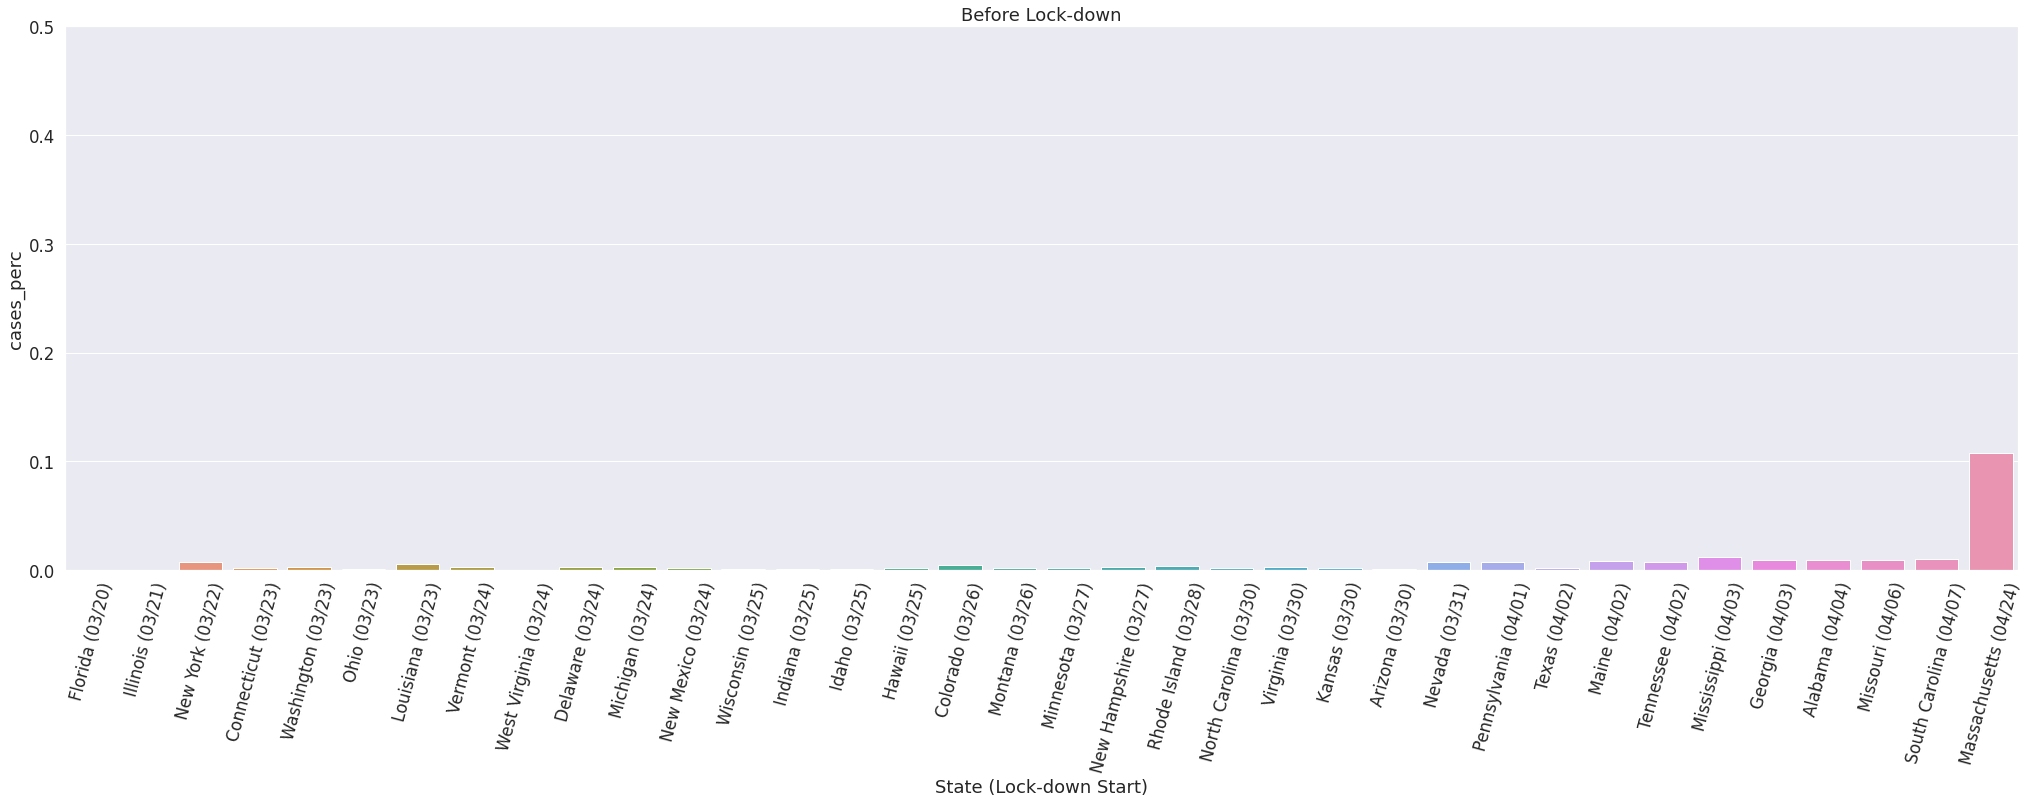

In [0]:
x_var = 'State (Lock-down Start)'
y_var = 'cases_perc'

title = 'Before Lock-down'

plot_barplots(before_lock_down_means,x_var,y_var, title=title, limits=(0,0.5))

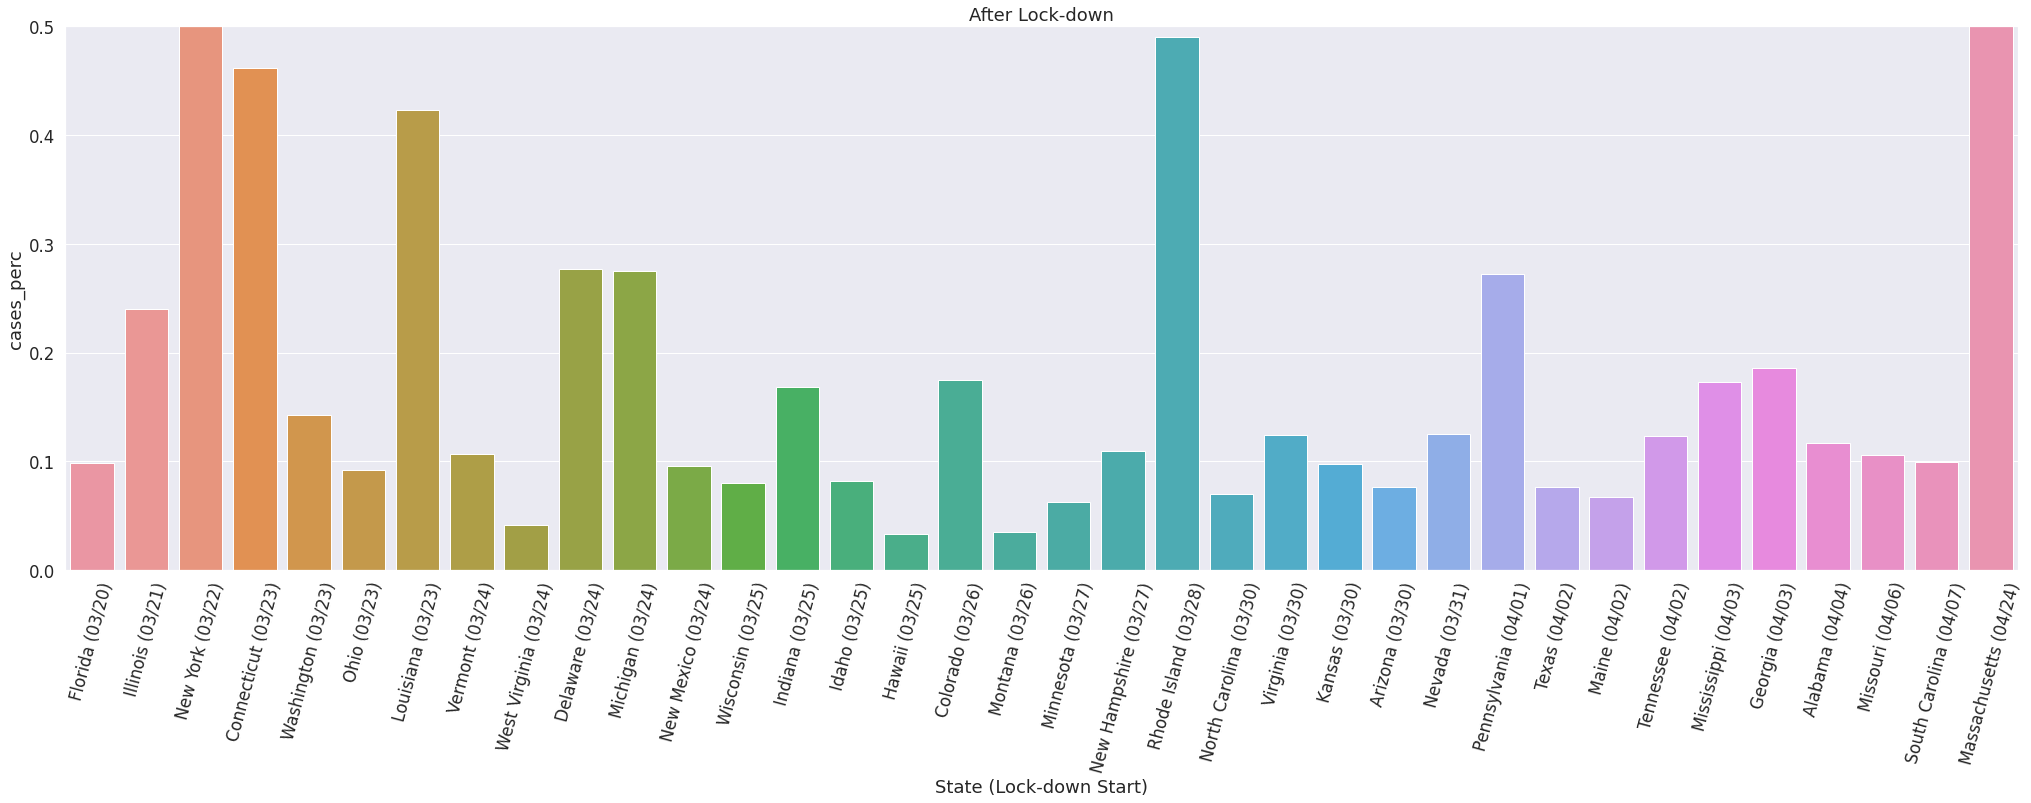

In [0]:
x_var = 'State (Lock-down Start)'
y_var = 'cases_perc'

title = 'After Lock-down'

plot_barplots(after_lock_down_means,x_var,y_var, title=title, limits=(0,0.5))

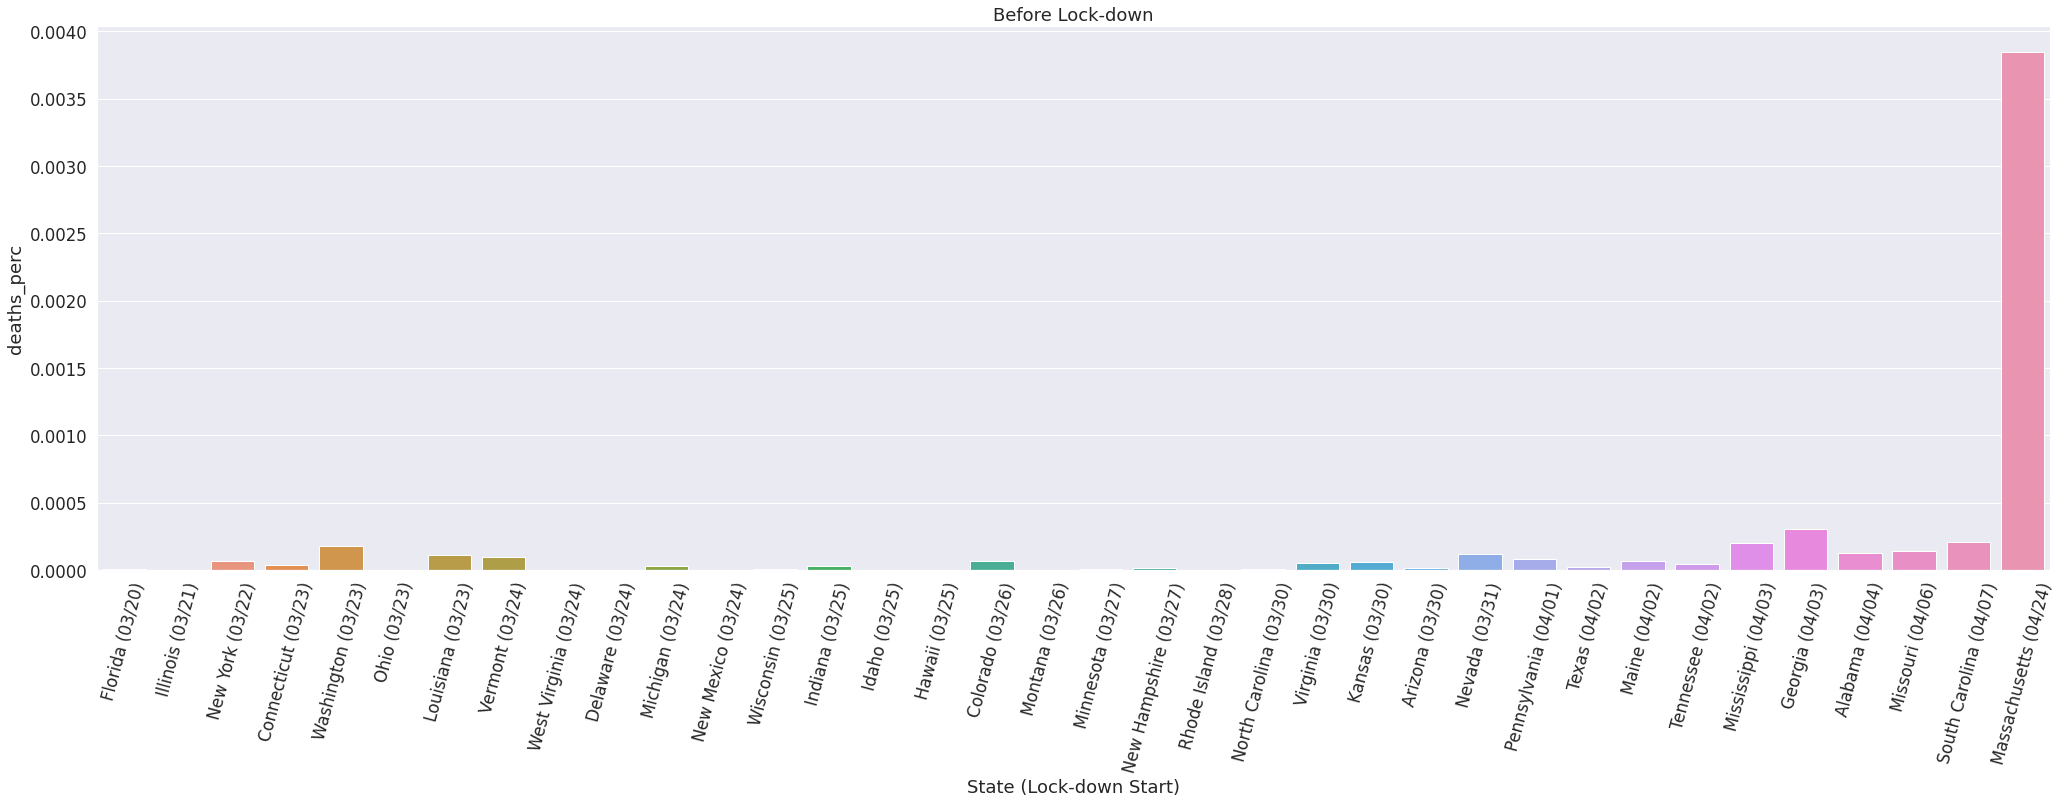

In [0]:
x_var = 'State (Lock-down Start)'
y_var = 'deaths_perc'

title = 'Before Lock-down'

plot_barplots(before_lock_down_means,x_var,y_var, title=title)

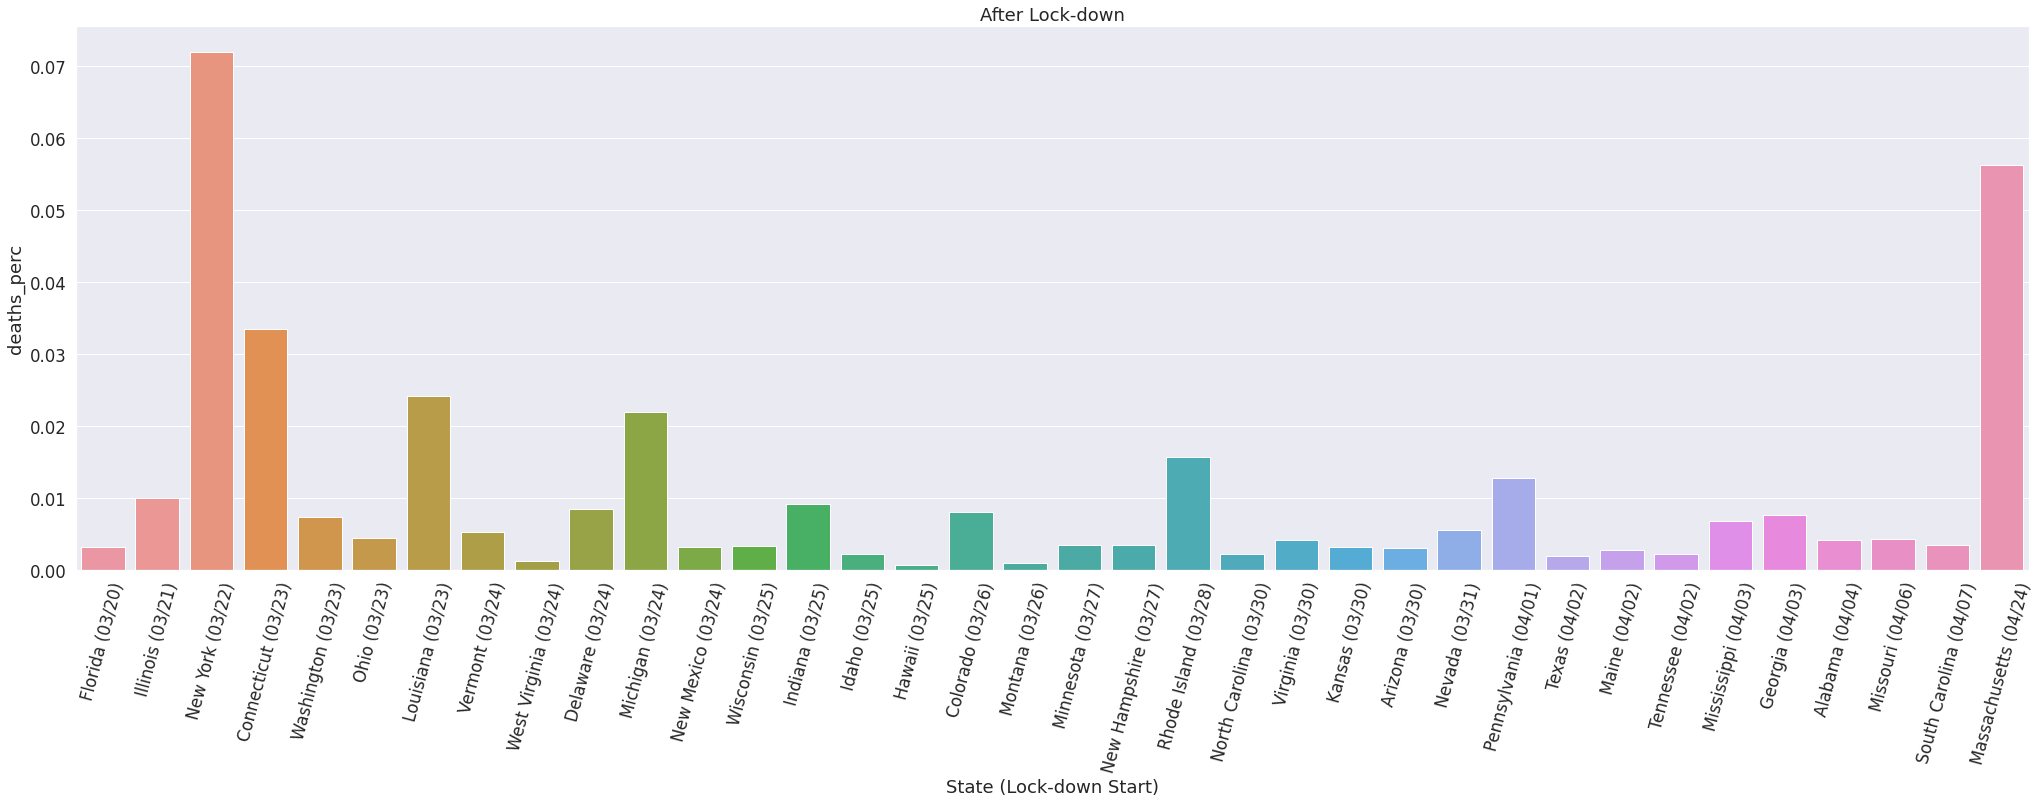

In [0]:
x_var = 'State (Lock-down Start)'
y_var = 'deaths_perc'

title = 'After Lock-down'

plot_barplots(after_lock_down_means,x_var,y_var, title=title)

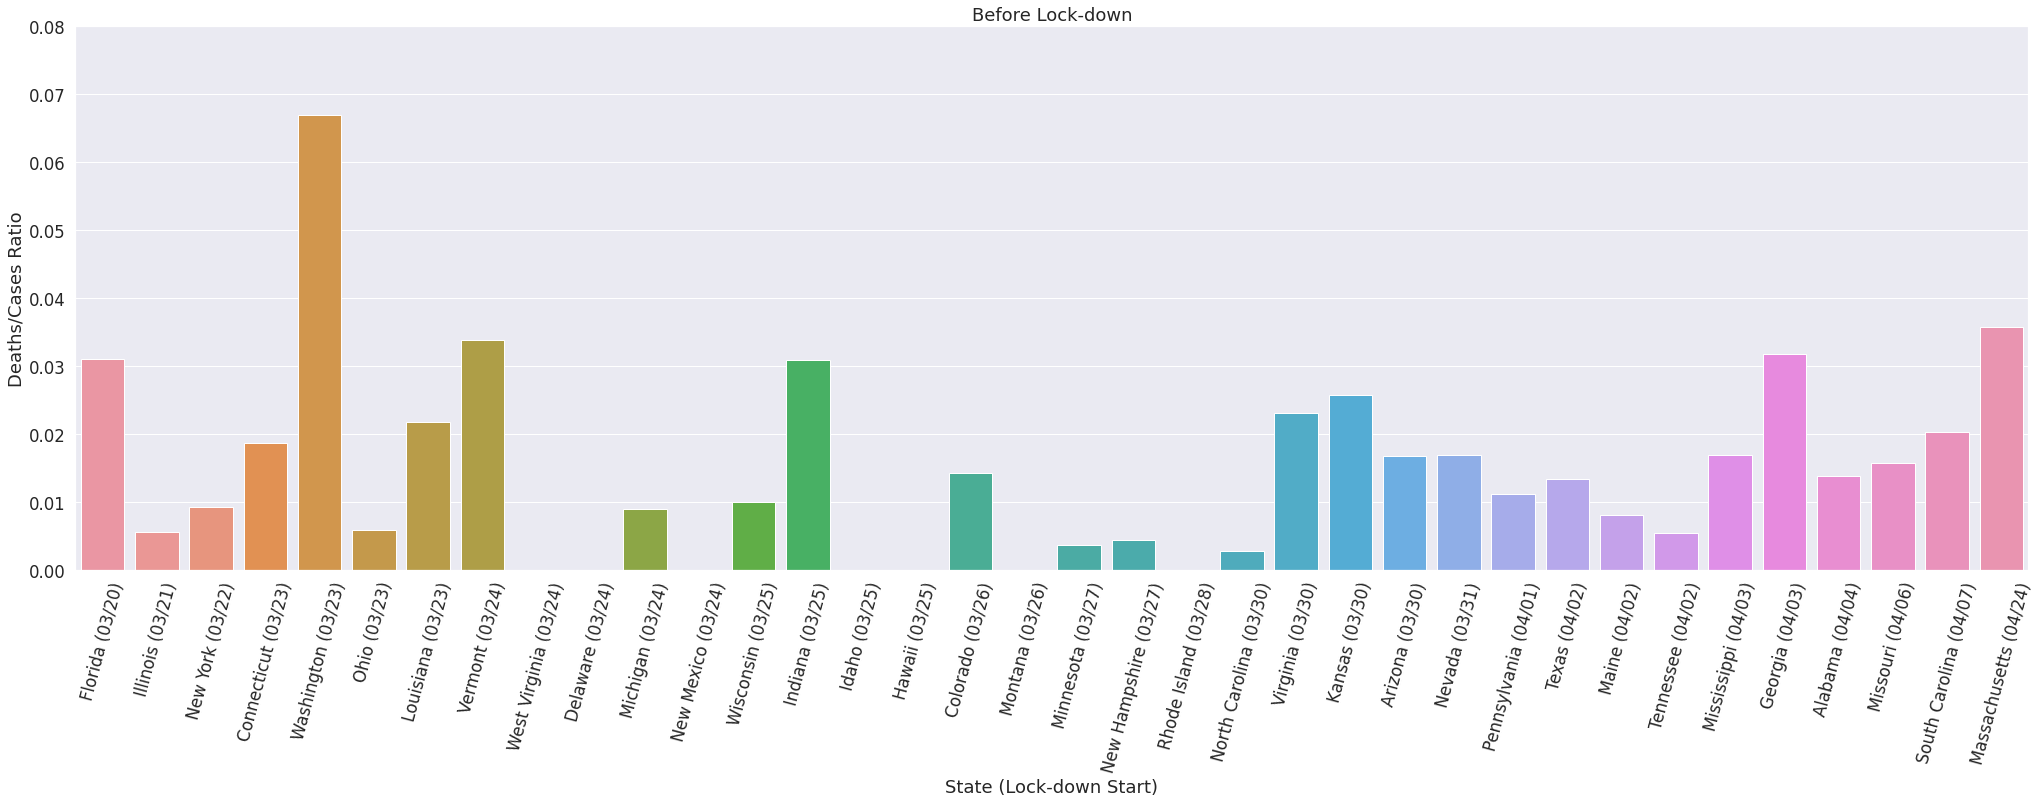

In [0]:
x_var = 'State (Lock-down Start)'
y_var = 'Deaths/Cases Ratio'

title = 'Before Lock-down'

plot_barplots(before_lock_down_means,x_var,y_var, title=title, limits=(0,0.08))

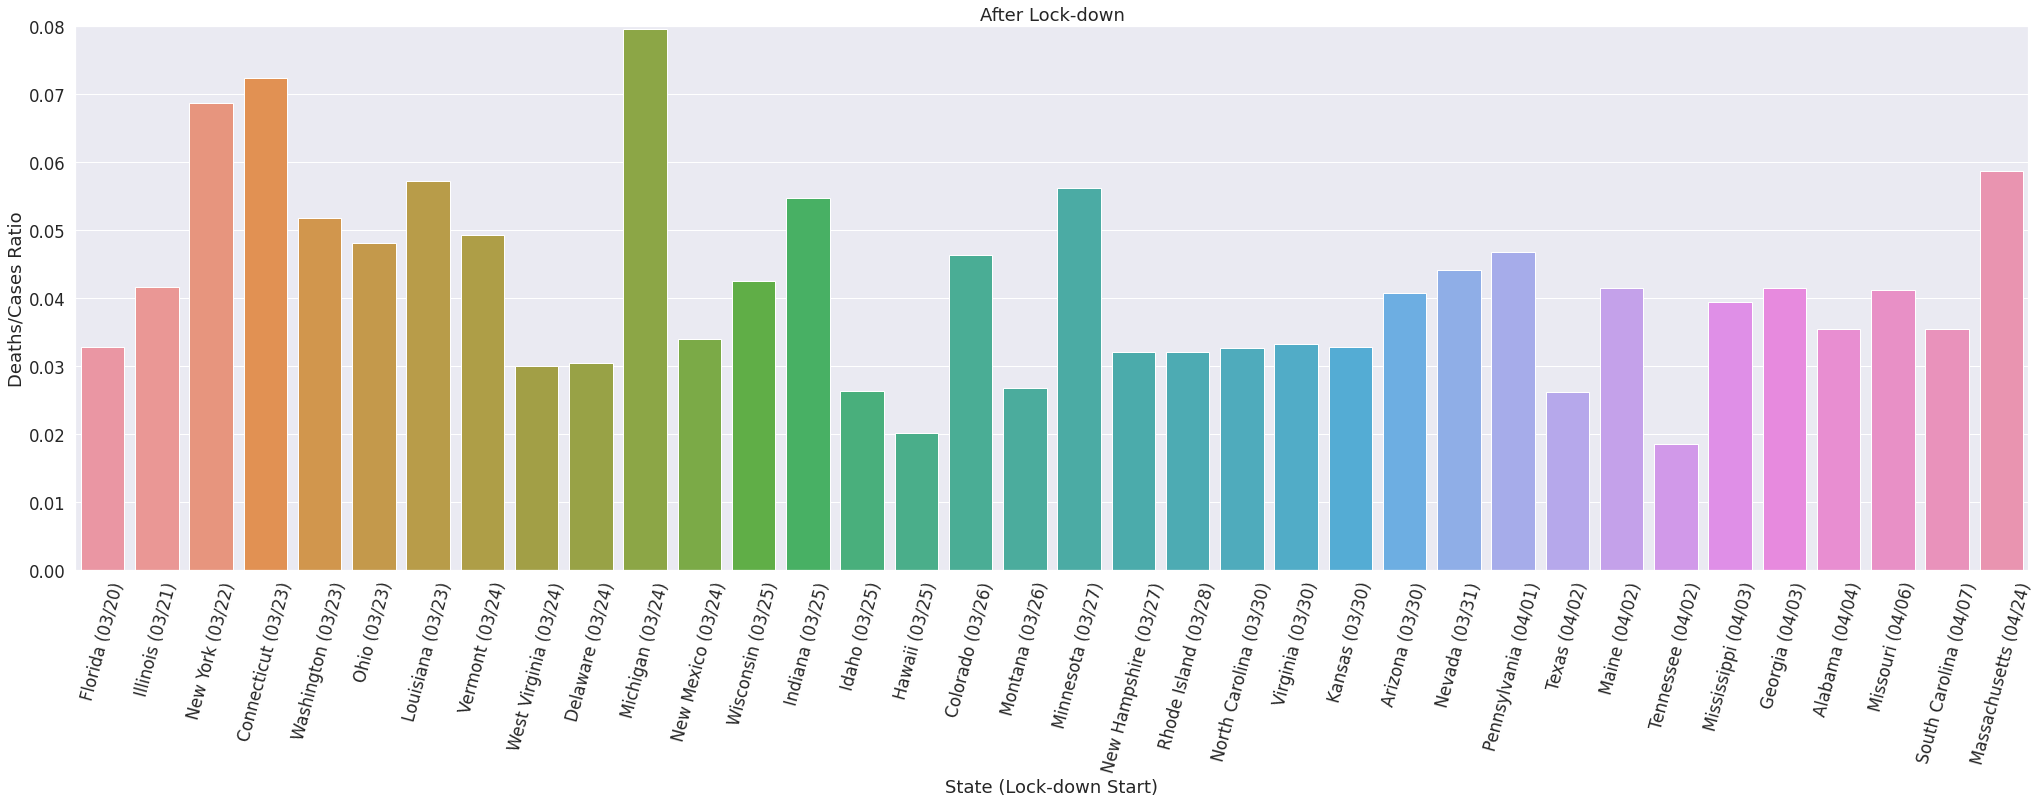

In [0]:
x_var = 'State (Lock-down Start)'
y_var = 'Deaths/Cases Ratio'

title = 'After Lock-down'

plot_barplots(after_lock_down_means,x_var,y_var, title=title, limits=(0,0.08))

In [0]:
# create a data frame for lock-down effects
before_lock_down_means.dropna(axis=0, inplace=True)
after_lock_down_means.dropna(axis=0, inplace=True)

Deltas_df = before_lock_down_means[['state','cases','deaths','Lockdown_Length','cases_perc', 'deaths_perc','Date_Start_of_Lockdown', 'Date_End_of_Lockdown','State (Lock-down Start)', 'Deaths/Cases Ratio']].merge(
    after_lock_down_means[['state','cases', 'deaths', 'cases_perc', 'deaths_perc', 'Deaths/Cases Ratio']], how='inner', on='state', suffixes=('_before','_after'))

Deltas_df['increase_in_cases'] = Deltas_df['cases_after']-Deltas_df['cases_before']
Deltas_df['increase_in_deaths'] = Deltas_df['deaths_after']-Deltas_df['deaths_before']
Deltas_df['increase_in_cases_perc'] = Deltas_df['cases_perc_after']-Deltas_df['cases_perc_before']
Deltas_df['increase_in_deaths_perc'] = Deltas_df['deaths_perc_after']-Deltas_df['deaths_perc_before']

In [0]:
# Check new data frame.
Deltas_df.head()

state  cases_before  ...  increase_in_cases_perc  increase_in_deaths_perc
0      Florida     79.736842  ...                0.098314                 0.003224
1     Illinois     34.263158  ...                0.240262                 0.010002
2     New York   1393.047619  ...                1.039690                 0.071895
3  Connecticut     78.600000  ...                0.460058                 0.033453
4   Washington    201.145161  ...                0.140183                 0.007231

[5 rows x 19 columns]

In [0]:
# Save csv to Google Drive

# Import Drive API and authenticate.
from google.colab import drive

# Mount your Drive to the Colab VM.
drive.mount('/gdrive')

# Write the DataFrame to CSV file.
with open('/gdrive/My Drive/Deltas_df.csv', 'w') as f:
  Deltas_df.to_csv(f)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive


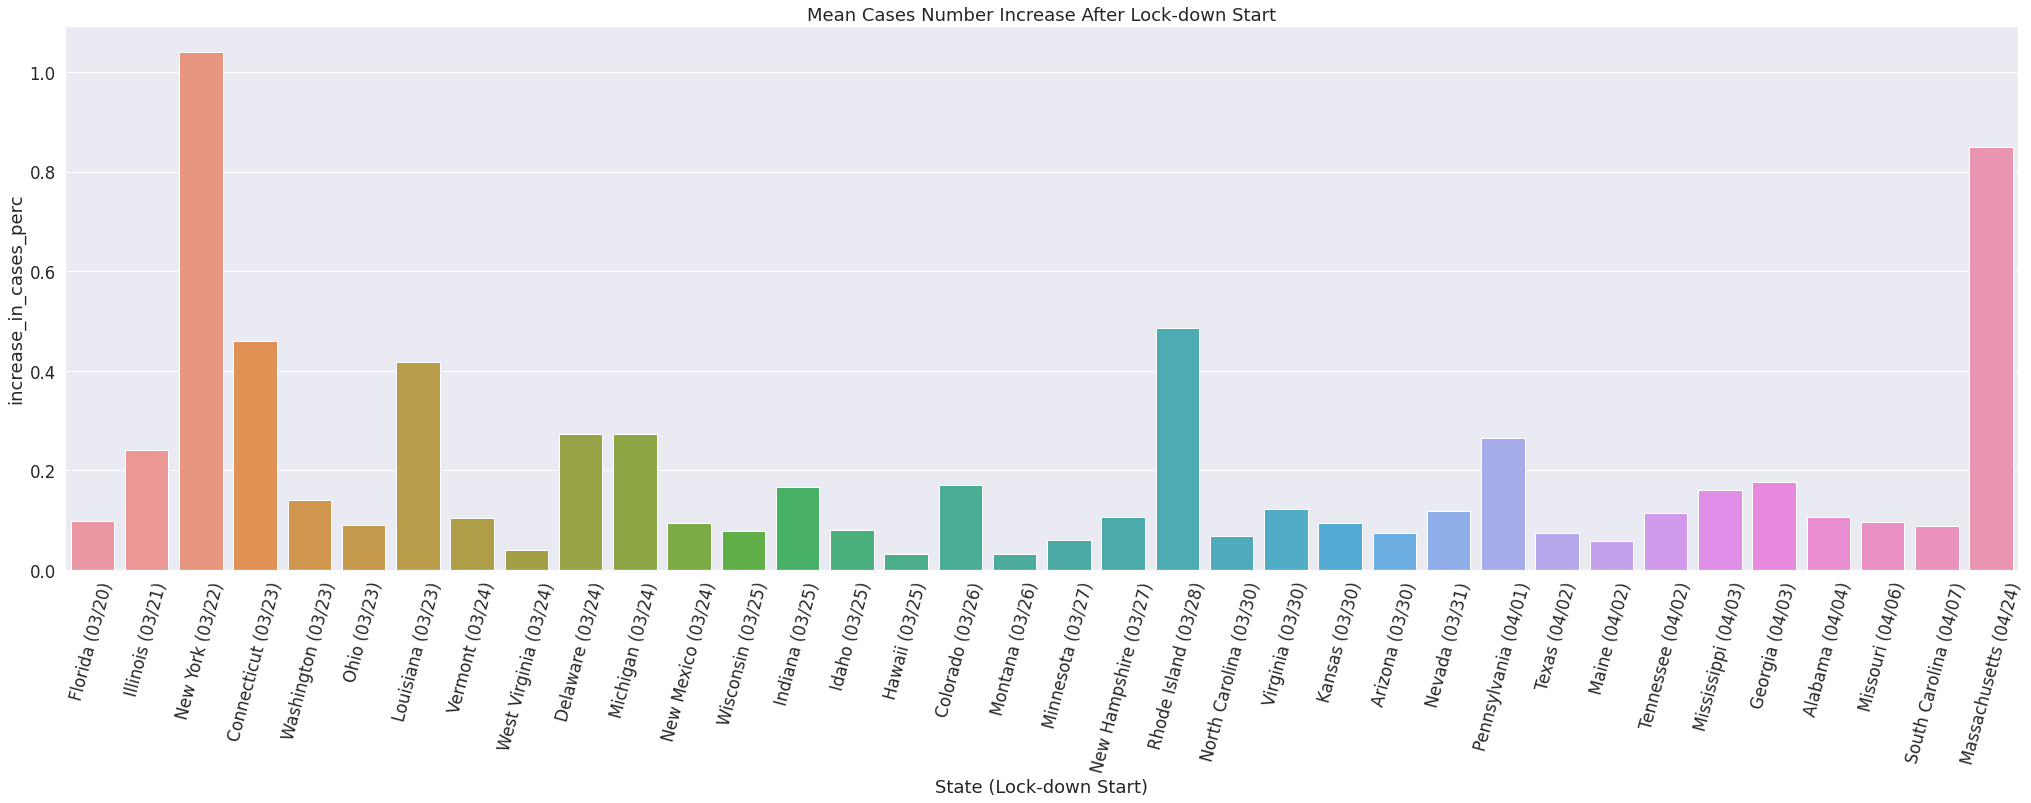

In [0]:
x_var = 'State (Lock-down Start)'
y_var = 'increase_in_cases_perc'

title = 'Mean Cases Number Increase After Lock-down Start'

plot_barplots(Deltas_df,x_var,y_var, title=title)

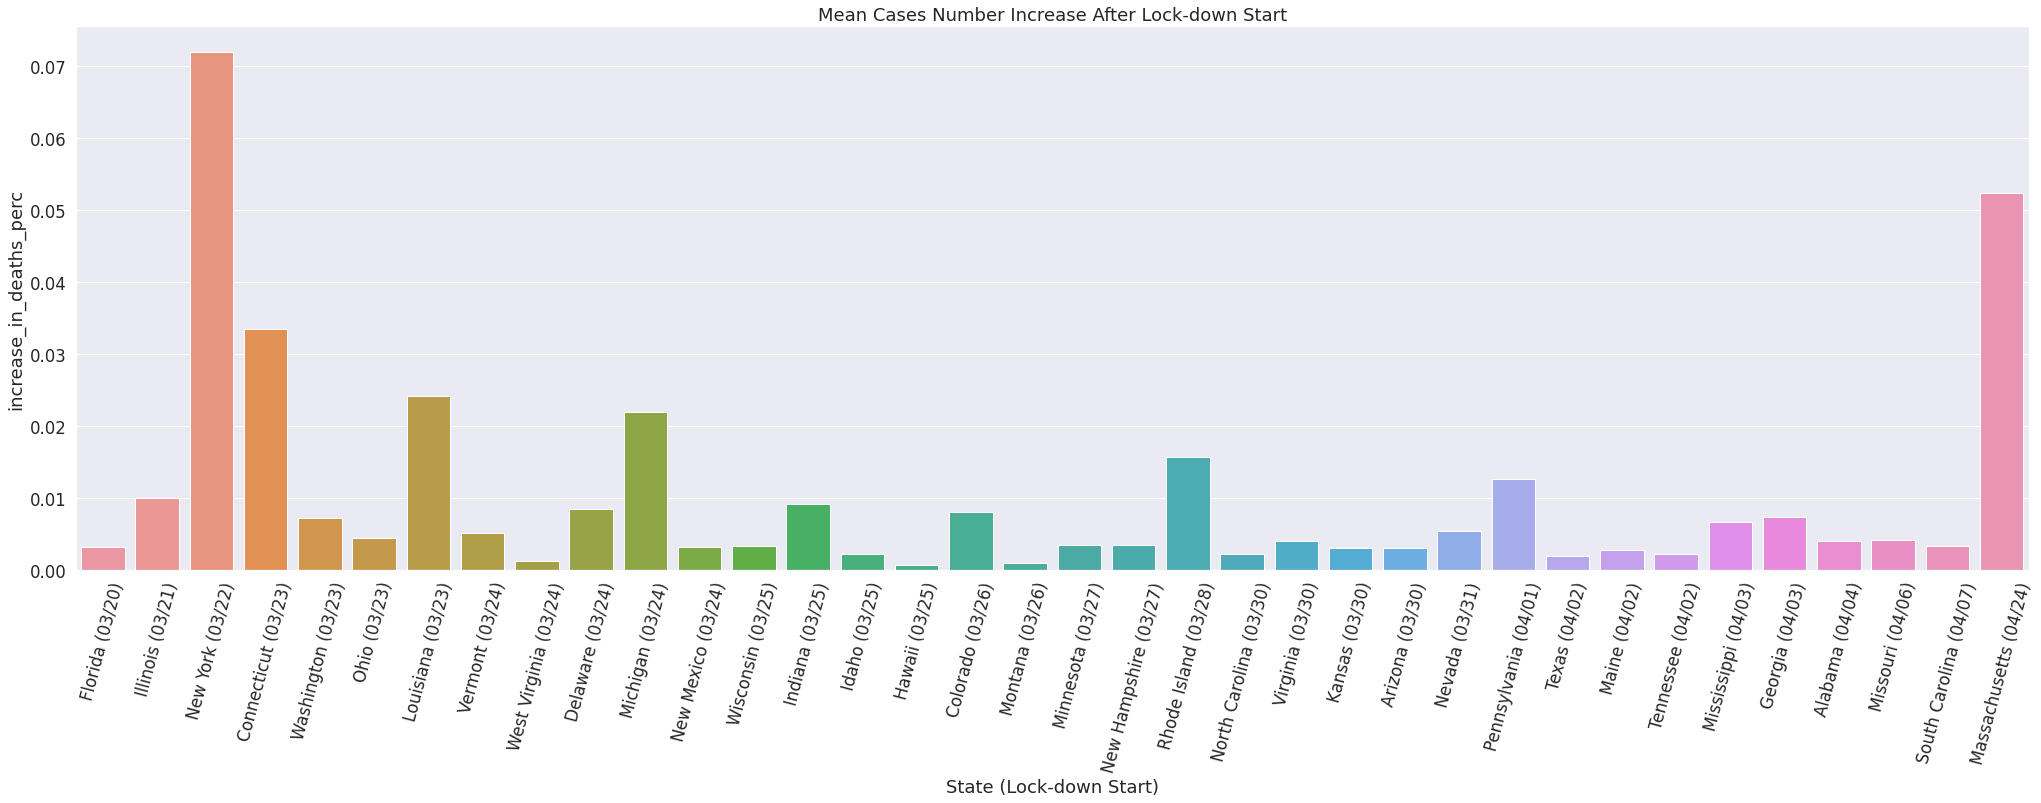

In [0]:
x_var = 'State (Lock-down Start)'
y_var = 'increase_in_deaths_perc'

title = 'Mean Cases Number Increase After Lock-down Start'

plot_barplots(Deltas_df,x_var,y_var, title=title)